In [104]:
#install.packages("ggupset")
#install.packages("ggcorrplot")
#if (!require(devtools)) install.packages("devtools")
#devtools::install_github("yanlinlin82/ggvenn")
#install.packages("GGally")
#install.packages("openxlsx")
#if (!requireNamespace("BiocManager", quietly = TRUE))
#  install.packages("BiocManager")
#BiocManager::install("GenomicDistributions")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.0 (2021-05-18)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'GenomicDistributions'”
Old packages: 'ape', 'BiocFileCache', 'BiocManager', 'biomaRt', 'blob', 'brew',
  'broom', 'clipr', 'commonmark', 'desc', 'doParallel', 'foreach', 'formatR',
  'gdata', 'GenomeInfoDb', 'GenomicFeatures', 'gert', 'gplots', 'httpuv',
  'httr', 'IRdisplay', 'IRkernel', 'iterators', 'kernlab', 'ks', 'lmtest',
  'MASS', 'Matrix', 'matrixStats', 'mclust', 'mgcv', 'nlme', 'openssl',
  'pbdZMQ', 'pkgbuild', 'plyr', 'pracma', 'processx', 'ps', 'RcppEigen',
  'RCurl', 'regioneR', 'repr', 'rprojroot', 'RSQLite', 'S4Vectors', 'sp',
  'speedglm', 'testthat', 'tidyr', 'uuid', 'waldo', 'xfun', 'XML', 'zoo'



In [106]:
library(dplyr)
library(stringr)
library(ggplot2)
library(ggupset)
library(UpSetR)
library(data.table)
library(ggcorrplot)
library(ggvenn)
library(GGally)
library(openxlsx)
library(GenomicDistributions)

In [3]:
#load data
Mu1_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_1/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_1", .before = GeneID)
Mu2_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_2/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_2", .before = GeneID)
#we skip library 3 - Co125 background!
Mu3_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_3/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_3", .before = GeneID)
Mu4_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_4/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_4", .before = GeneID)
Mu5_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_5/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_5", .before = GeneID)
Mu6_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_6/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_6", .before = GeneID)
Mu7_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_7/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_7", .before = GeneID)
Mu8_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_8/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_8", .before = GeneID)
#F7
Mu_F7_1_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-1//MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_F7_1", .before = GeneID)

Mu_F7_2_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-2//MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_F7_2", .before = GeneID)

Mu_F7_3_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-3//MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_F7_3", .before = GeneID)

Mu_F7_4_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-4//MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_F7_4", .before = GeneID)

In [4]:
#merge data
all_Mu_merged <- bind_rows(
  Mu1_germinal_annotated,
  Mu2_germinal_annotated,
  Mu3_germinal_annotated,
  Mu4_germinal_annotated,
  Mu5_germinal_annotated,
  Mu6_germinal_annotated,
  Mu7_germinal_annotated,
  Mu8_germinal_annotated,
  Mu_F7_1_germinal_annotated,
  Mu_F7_2_germinal_annotated,
  Mu_F7_3_germinal_annotated,
  Mu_F7_4_germinal_annotated)

B73_Mu_merged <- all_Mu_merged %>%
  filter(!str_detect(lib, 'F7'))

F7_Mu_merged <- all_Mu_merged %>%
  filter(str_detect(lib, 'F7'))

### Overlap of top N Mu species between libraries

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



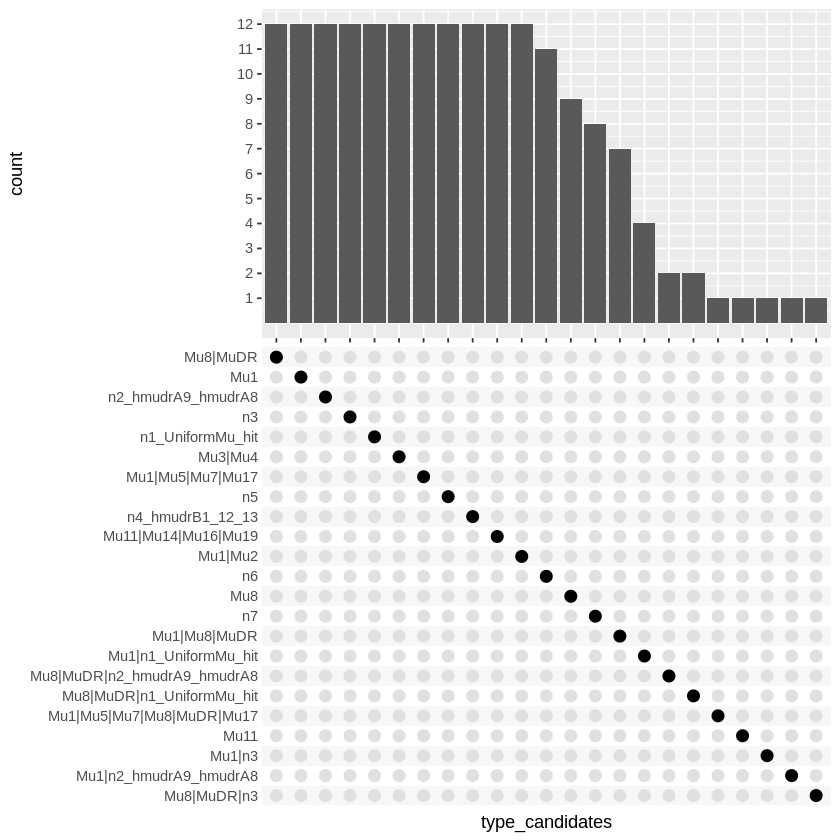

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



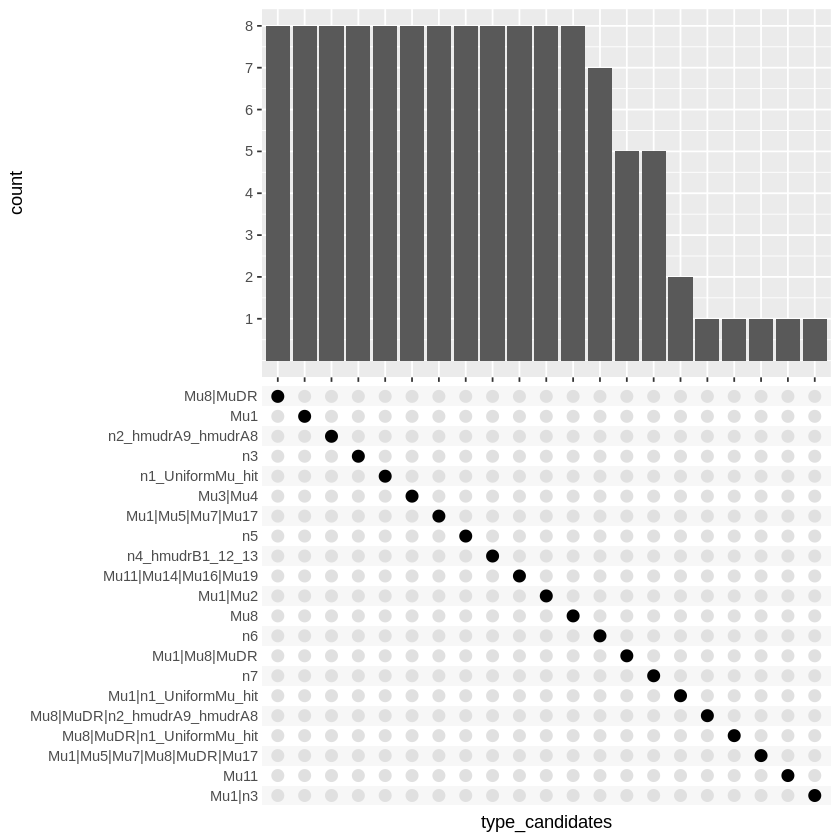

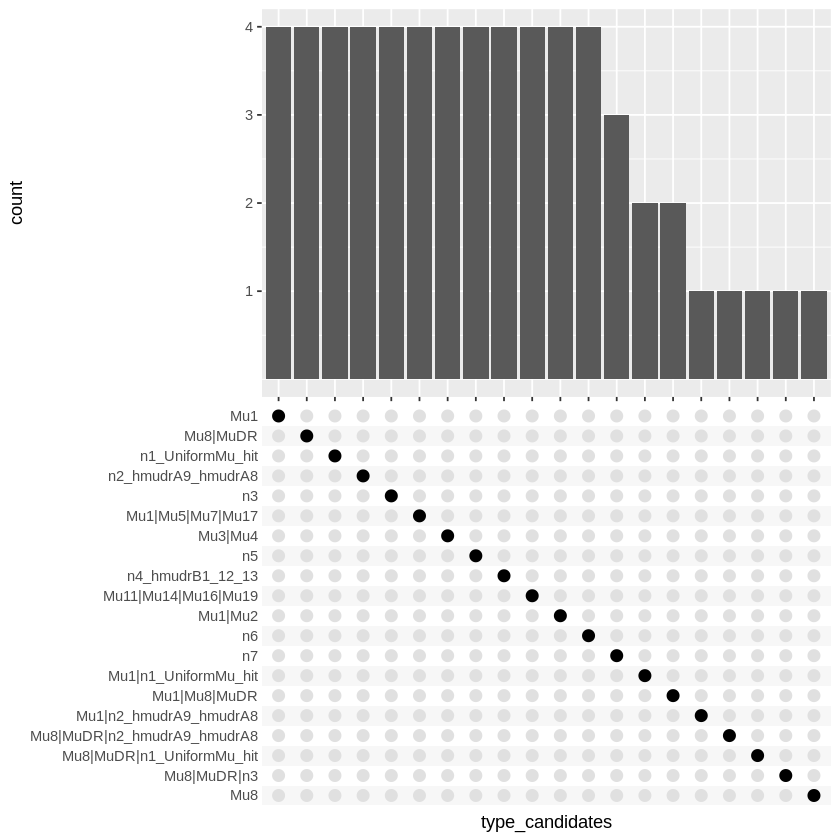

In [5]:
pd <- all_Mu_merged %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(lib, desc(count)) %>%
  slice(1:15) %>%
  ungroup() %>%
  mutate(type_candidates = as.list(type_candidates)) %>%
  mutate(lib = as.list(lib))


all_pd <- as.data.frame(pd)
#head(pd)

ggplot(pd, aes(x=type_candidates)) +
    geom_bar() +
    scale_y_continuous(limit = c(0, 12), breaks = c(1,2,3,4,5,6,7,8,9,10,11,12)) +
    scale_x_upset(n_intersections = Inf, order_by = "degree")



####just B73
pd <- B73_Mu_merged %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(lib, desc(count)) %>%
  slice(1:15) %>%
  ungroup() %>%
  mutate(type_candidates = as.list(type_candidates)) %>%
  mutate(lib = as.list(lib))


B73_pd <- as.data.frame(pd)

ggplot(pd, aes(x=type_candidates)) +
    geom_bar() +
    scale_y_continuous(limit = c(0, 8), breaks = c(1,2,3,4,5,6,7,8)) +
    scale_x_upset(n_intersections = Inf, order_by = "degree")



####just F7
pd <- F7_Mu_merged %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(lib, desc(count)) %>%
  slice(1:15) %>%
  ungroup() %>%
  mutate(type_candidates = as.list(type_candidates)) %>%
  mutate(lib = as.list(lib))


F7_pd <- as.data.frame(pd)

ggplot(pd, aes(x=type_candidates)) +
    geom_bar() +
    scale_y_continuous(limit = c(0, 4), breaks = c(1,2,3,4)) +
    scale_x_upset(n_intersections = Inf, order_by = "degree")


#code ideas - classic UpSetR
#  select(-lib) %>%

#Mu1 <- a %>% filter(lib == "Mu1") %>% pull(type_candidates)
#Mu2 <- a %>% filter(lib == "Mu2") %>% pull(type_candidates)
#Mu4 <- a %>% filter(lib == "Mu4") %>% pull(type_candidates)
#Mu5 <- a %>% filter(lib == "Mu5") %>% pull(type_candidates)
#Mu6 <- a %>% filter(lib == "Mu6") %>% pull(type_candidates)
#Mu7 <- a %>% filter(lib == "Mu7") %>% pull(type_candidates)
#Mu8 <- a %>% filter(lib == "Mu8") %>% pull(type_candidates)

#c <- list(Mu1 = Mu1, Mu2 = Mu2, Mu4 = Mu4, Mu5 = Mu5, Mu6 = Mu6, Mu7 = Mu7, Mu8 = Mu8)
#c
#upset(c, nsets = 20)

[[1]]
[1] "Mu1"

[[2]]
[1] "Mu8|MuDR"

[[3]]
[1] "n1_UniformMu_hit"

[[4]]
[1] "n2_hmudrA9_hmudrA8"

[[5]]
[1] "n3"

[[6]]
[1] "Mu1|Mu5|Mu7|Mu17"

[[1]]
[1] "Mu1"

[[2]]
[1] "Mu8|MuDR"

[[3]]
[1] "n2_hmudrA9_hmudrA8"

[[4]]
[1] "n1_UniformMu_hit"

[[5]]
[1] "n3"

[[6]]
[1] "Mu3|Mu4"

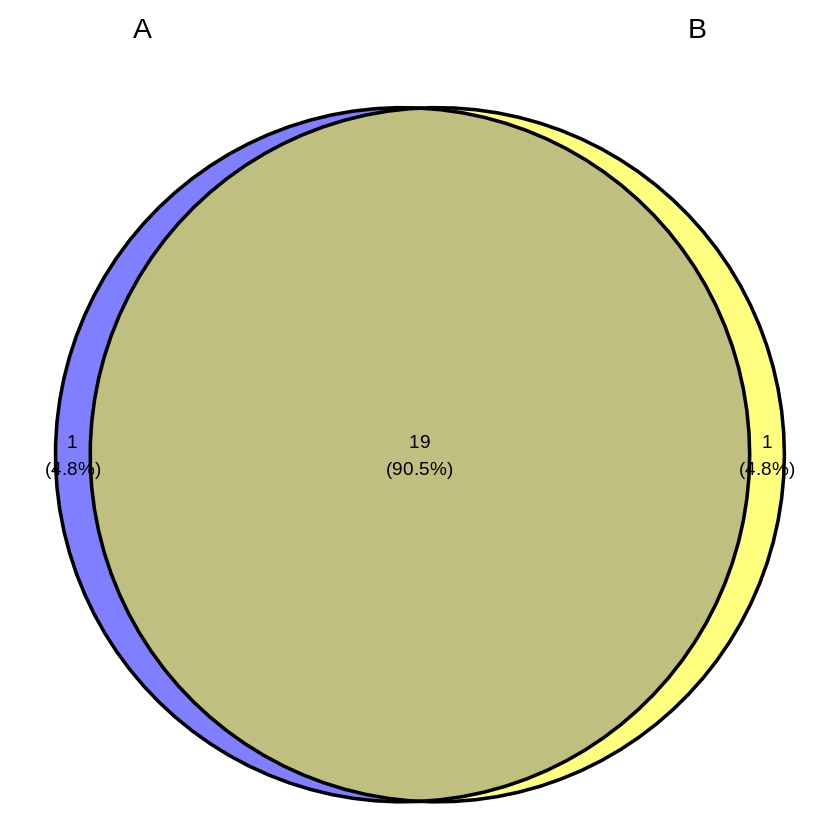

In [6]:
B73_pd <- B73_Mu_merged %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  slice(1:20) %>%
  ungroup() %>%
  mutate(type_candidates = as.list(type_candidates)) 

F7_pd <- F7_Mu_merged %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  slice(1:20) %>%
  ungroup() %>%
  mutate(type_candidates = as.list(type_candidates)) 

head(B73_pd$type_candidates)
head(F7_pd$type_candidates)

ggvenn(list(A=B73_pd$type_candidates, B=F7_pd$type_candidates), auto_scale=TRUE)

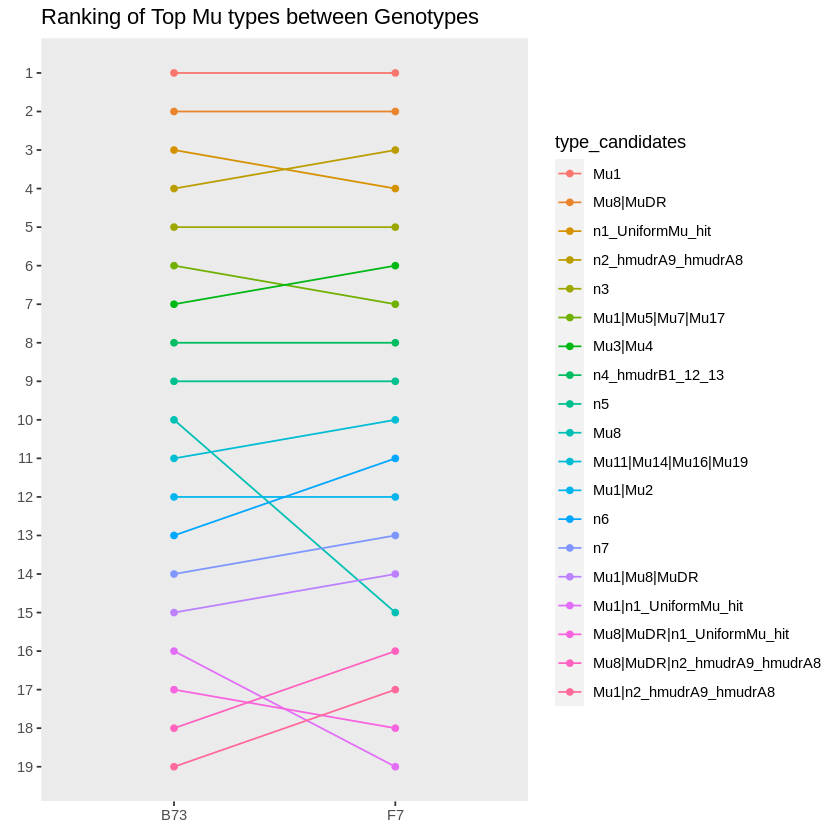

In [62]:
B73_pd <- B73_pd %>%
  mutate(rank = 1:n())

F7_pd <- F7_pd %>%
  mutate(rank = 1:n())

m <- left_join(B73_pd, F7_pd, by = "type_candidates") %>%
  select(-count.x, -count.y)

#transform to chr -> factor 
m$type_candidates <- as.character(m$type_candidates)
m$type_candidates <- as.factor(m$type_candidates)
#order factor so that legend is ordered based on B73
m$type_candidates <- factor(m$type_candidates, levels = B73_pd$type_candidates)
#rename groups
m <- m %>%
  dplyr::rename(B73 = rank.x, F7 = rank.y)


# Build plot
GGally::ggparcoord(m,
                   columns = 2:3, groupColumn = 1,  
                   scale="globalminmax", 
                   showPoints = TRUE, 
                   title = "Ranking of Top Mu types between Genotypes"
) + 
    # Reversed y axis with custom breaks to recreate 1:10 rankings
    scale_y_reverse(breaks = 1:20) +
    # Prettifies typography etc.
#    theme_void() + 
    # Removes gridlines
    theme(
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank()
    ) + 
    # Removes axis labels
    labs(
        y = element_blank(), 
        x = element_blank()
    )

### Count distribution of top N Mu species between libraries

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.


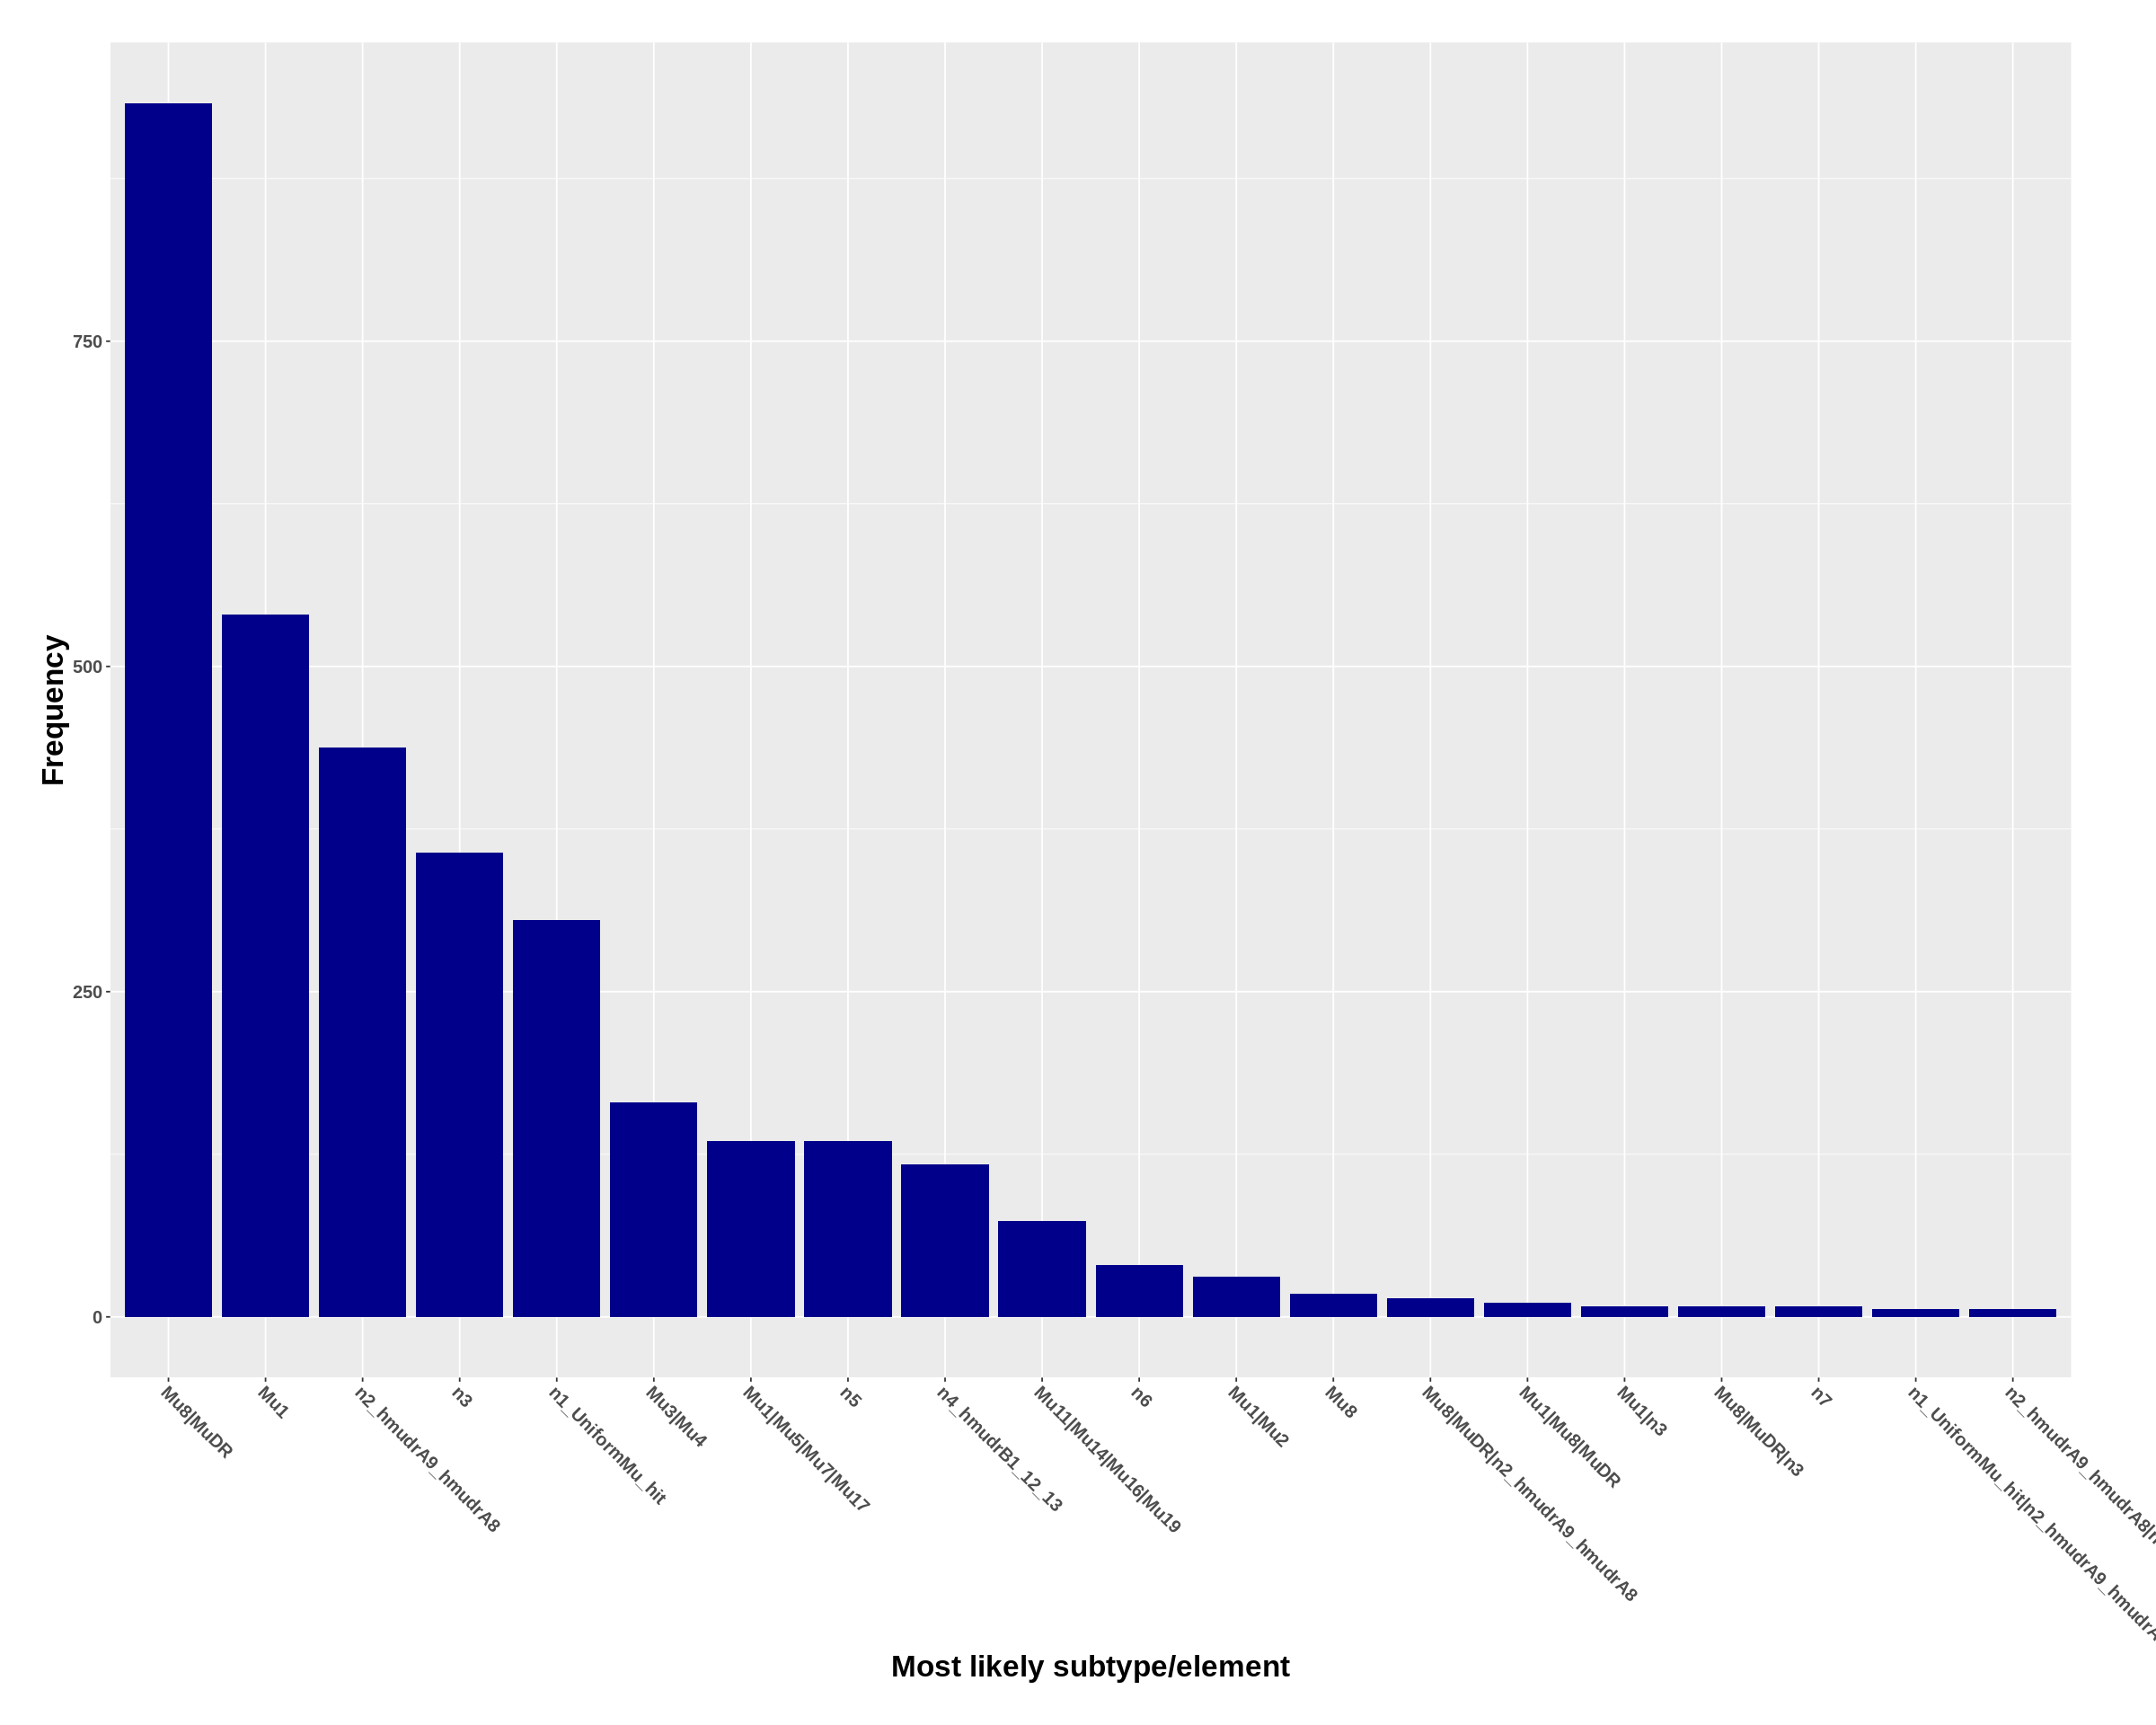

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.


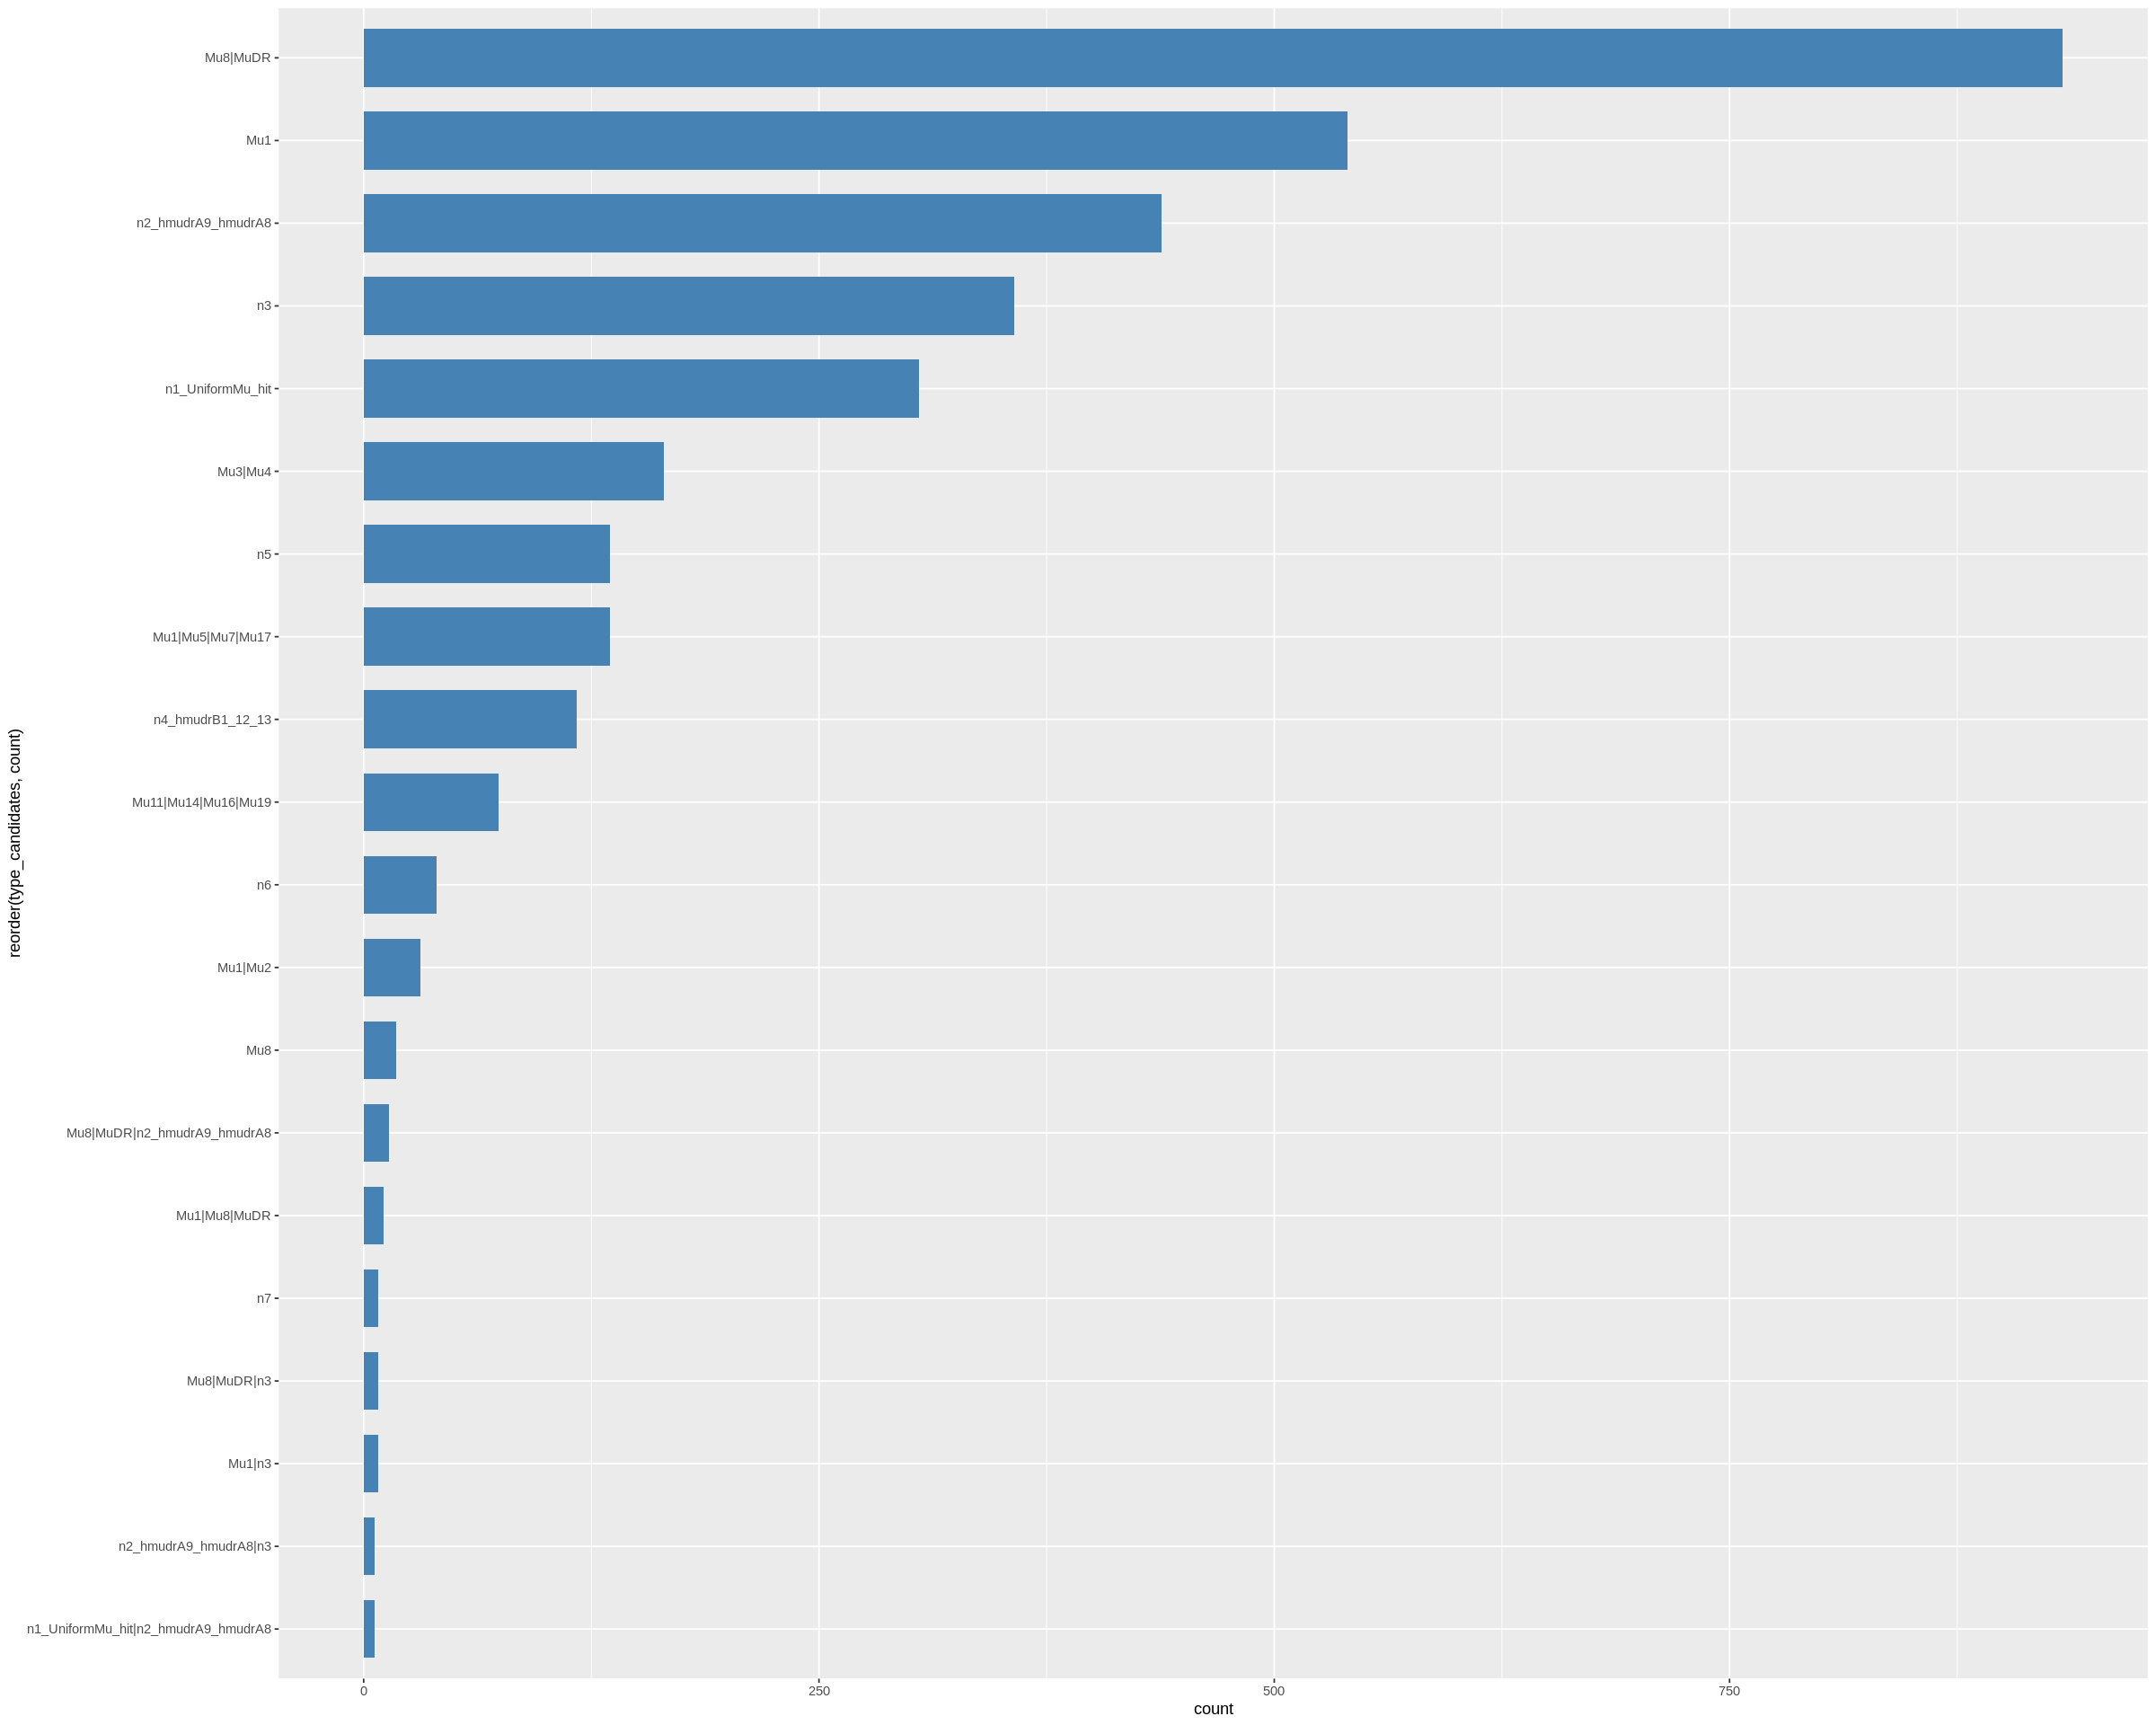

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.


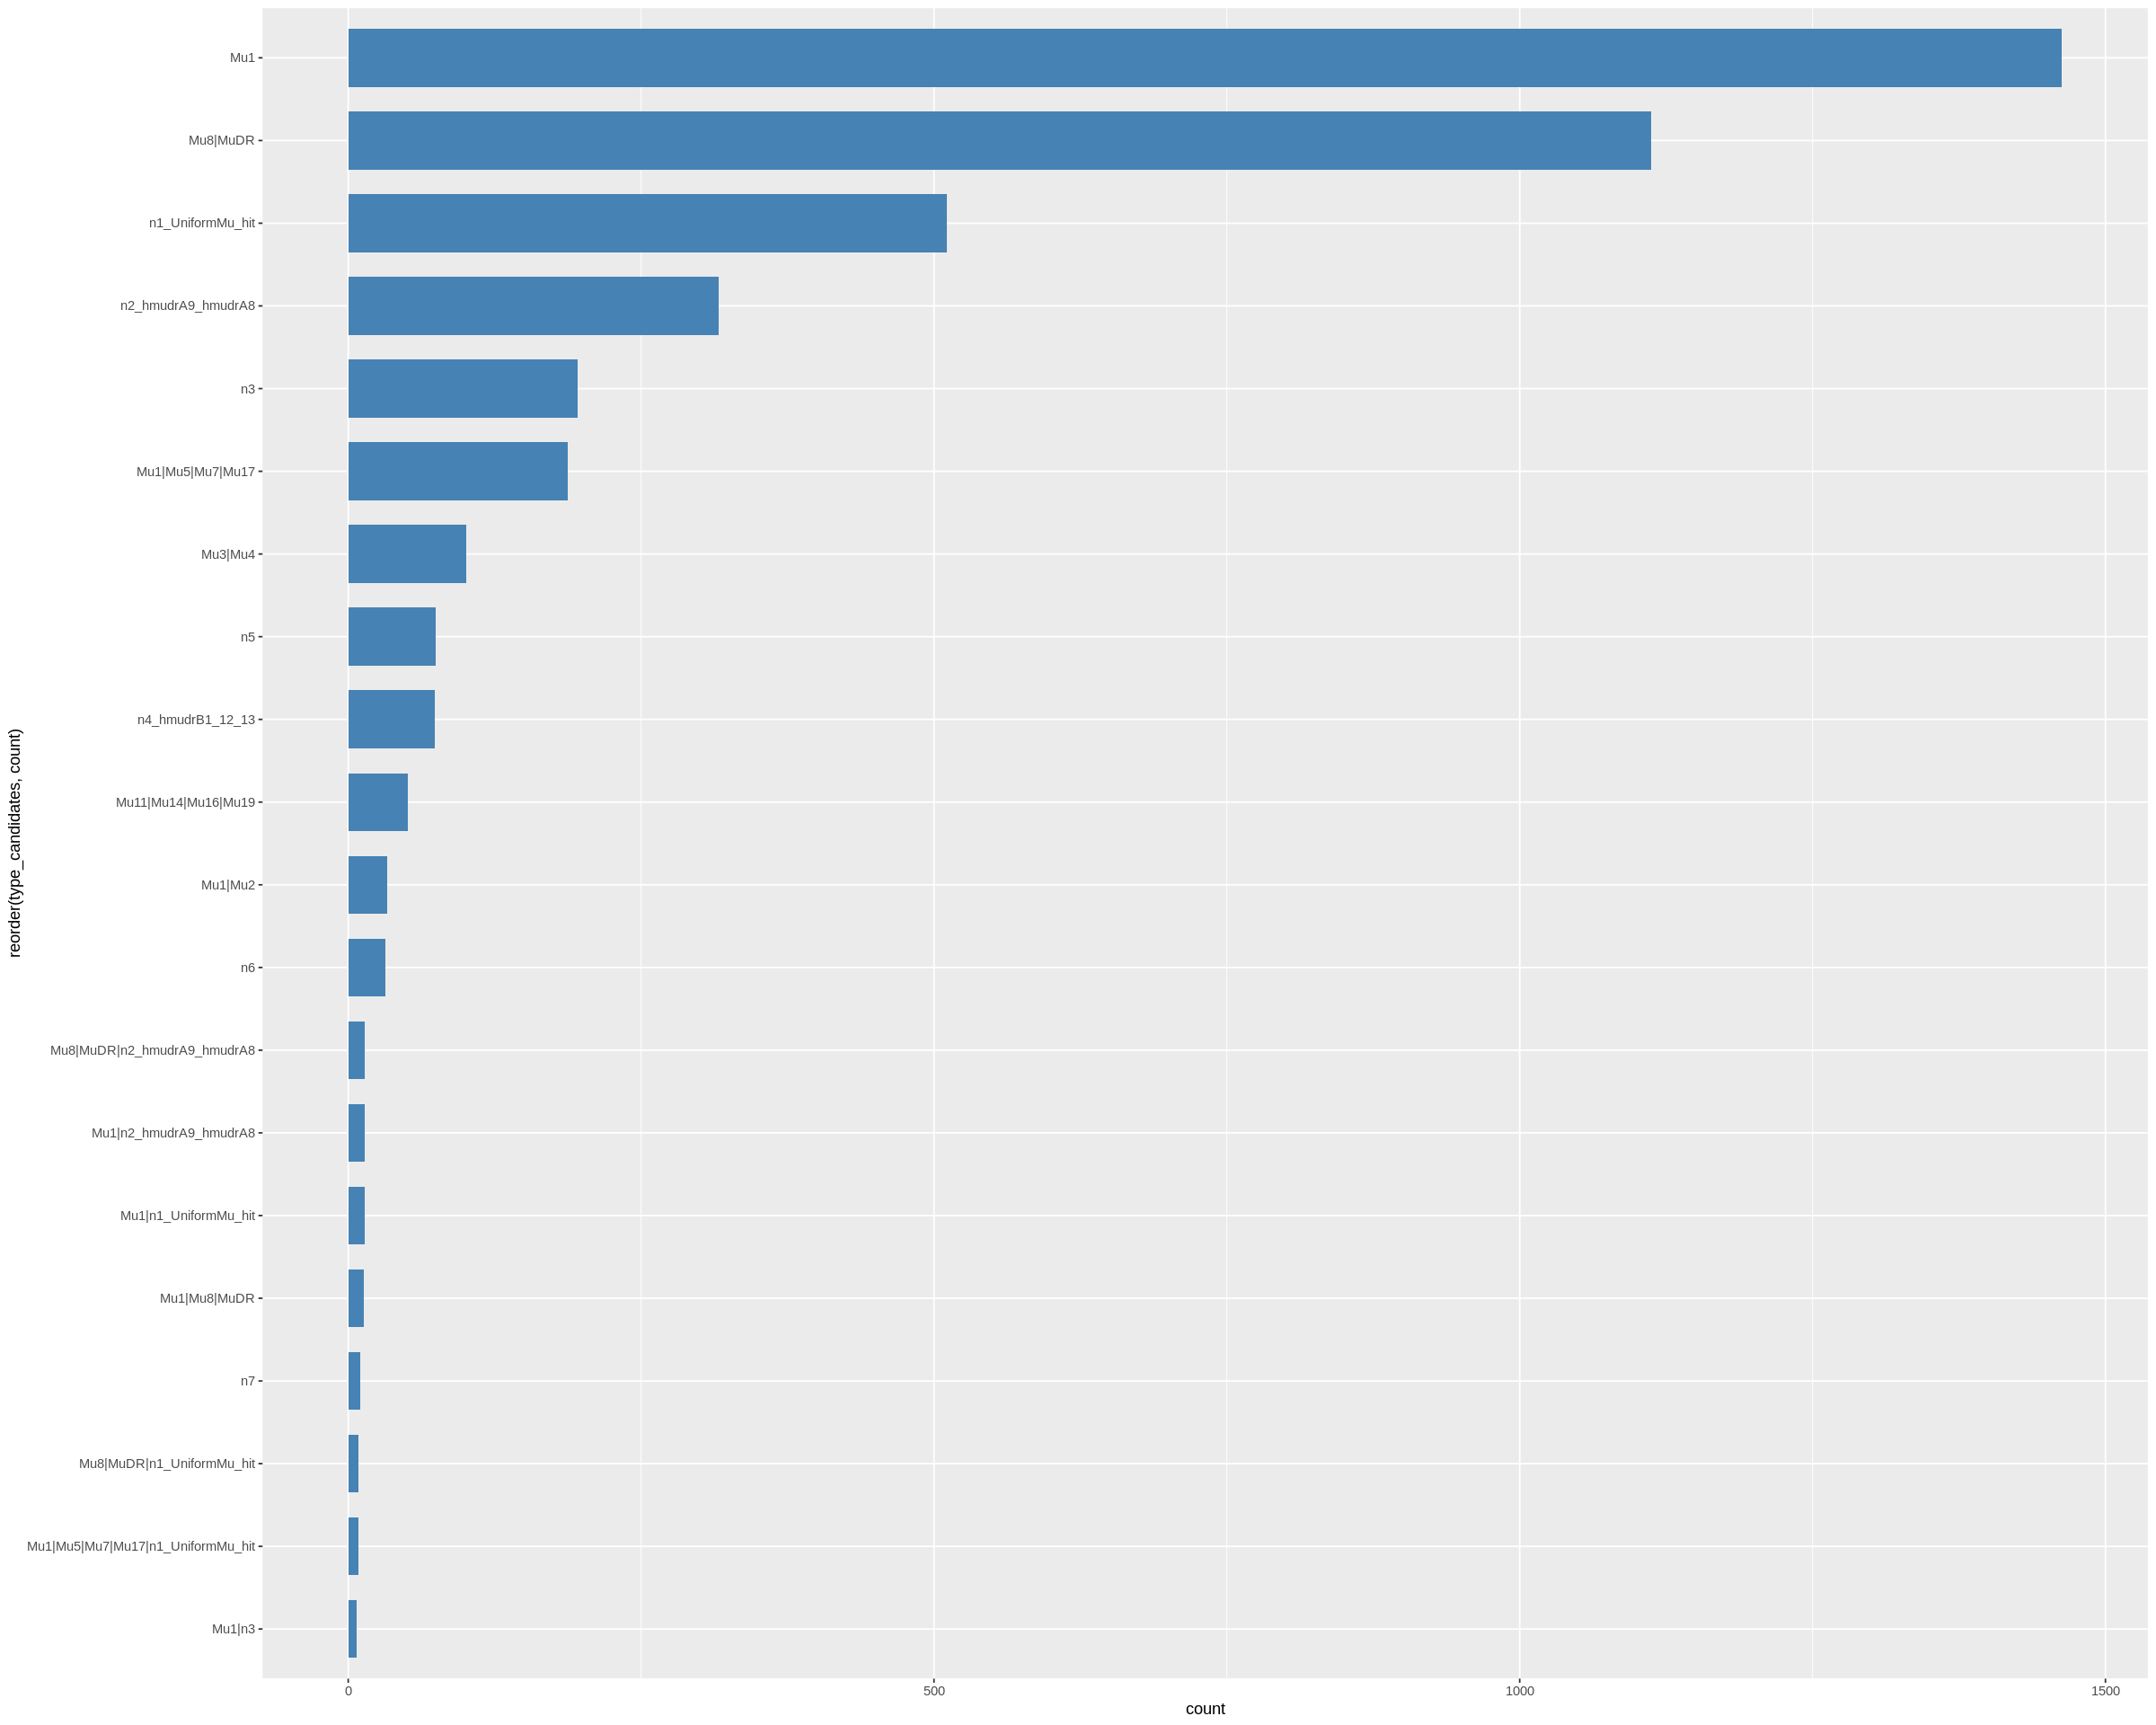

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.


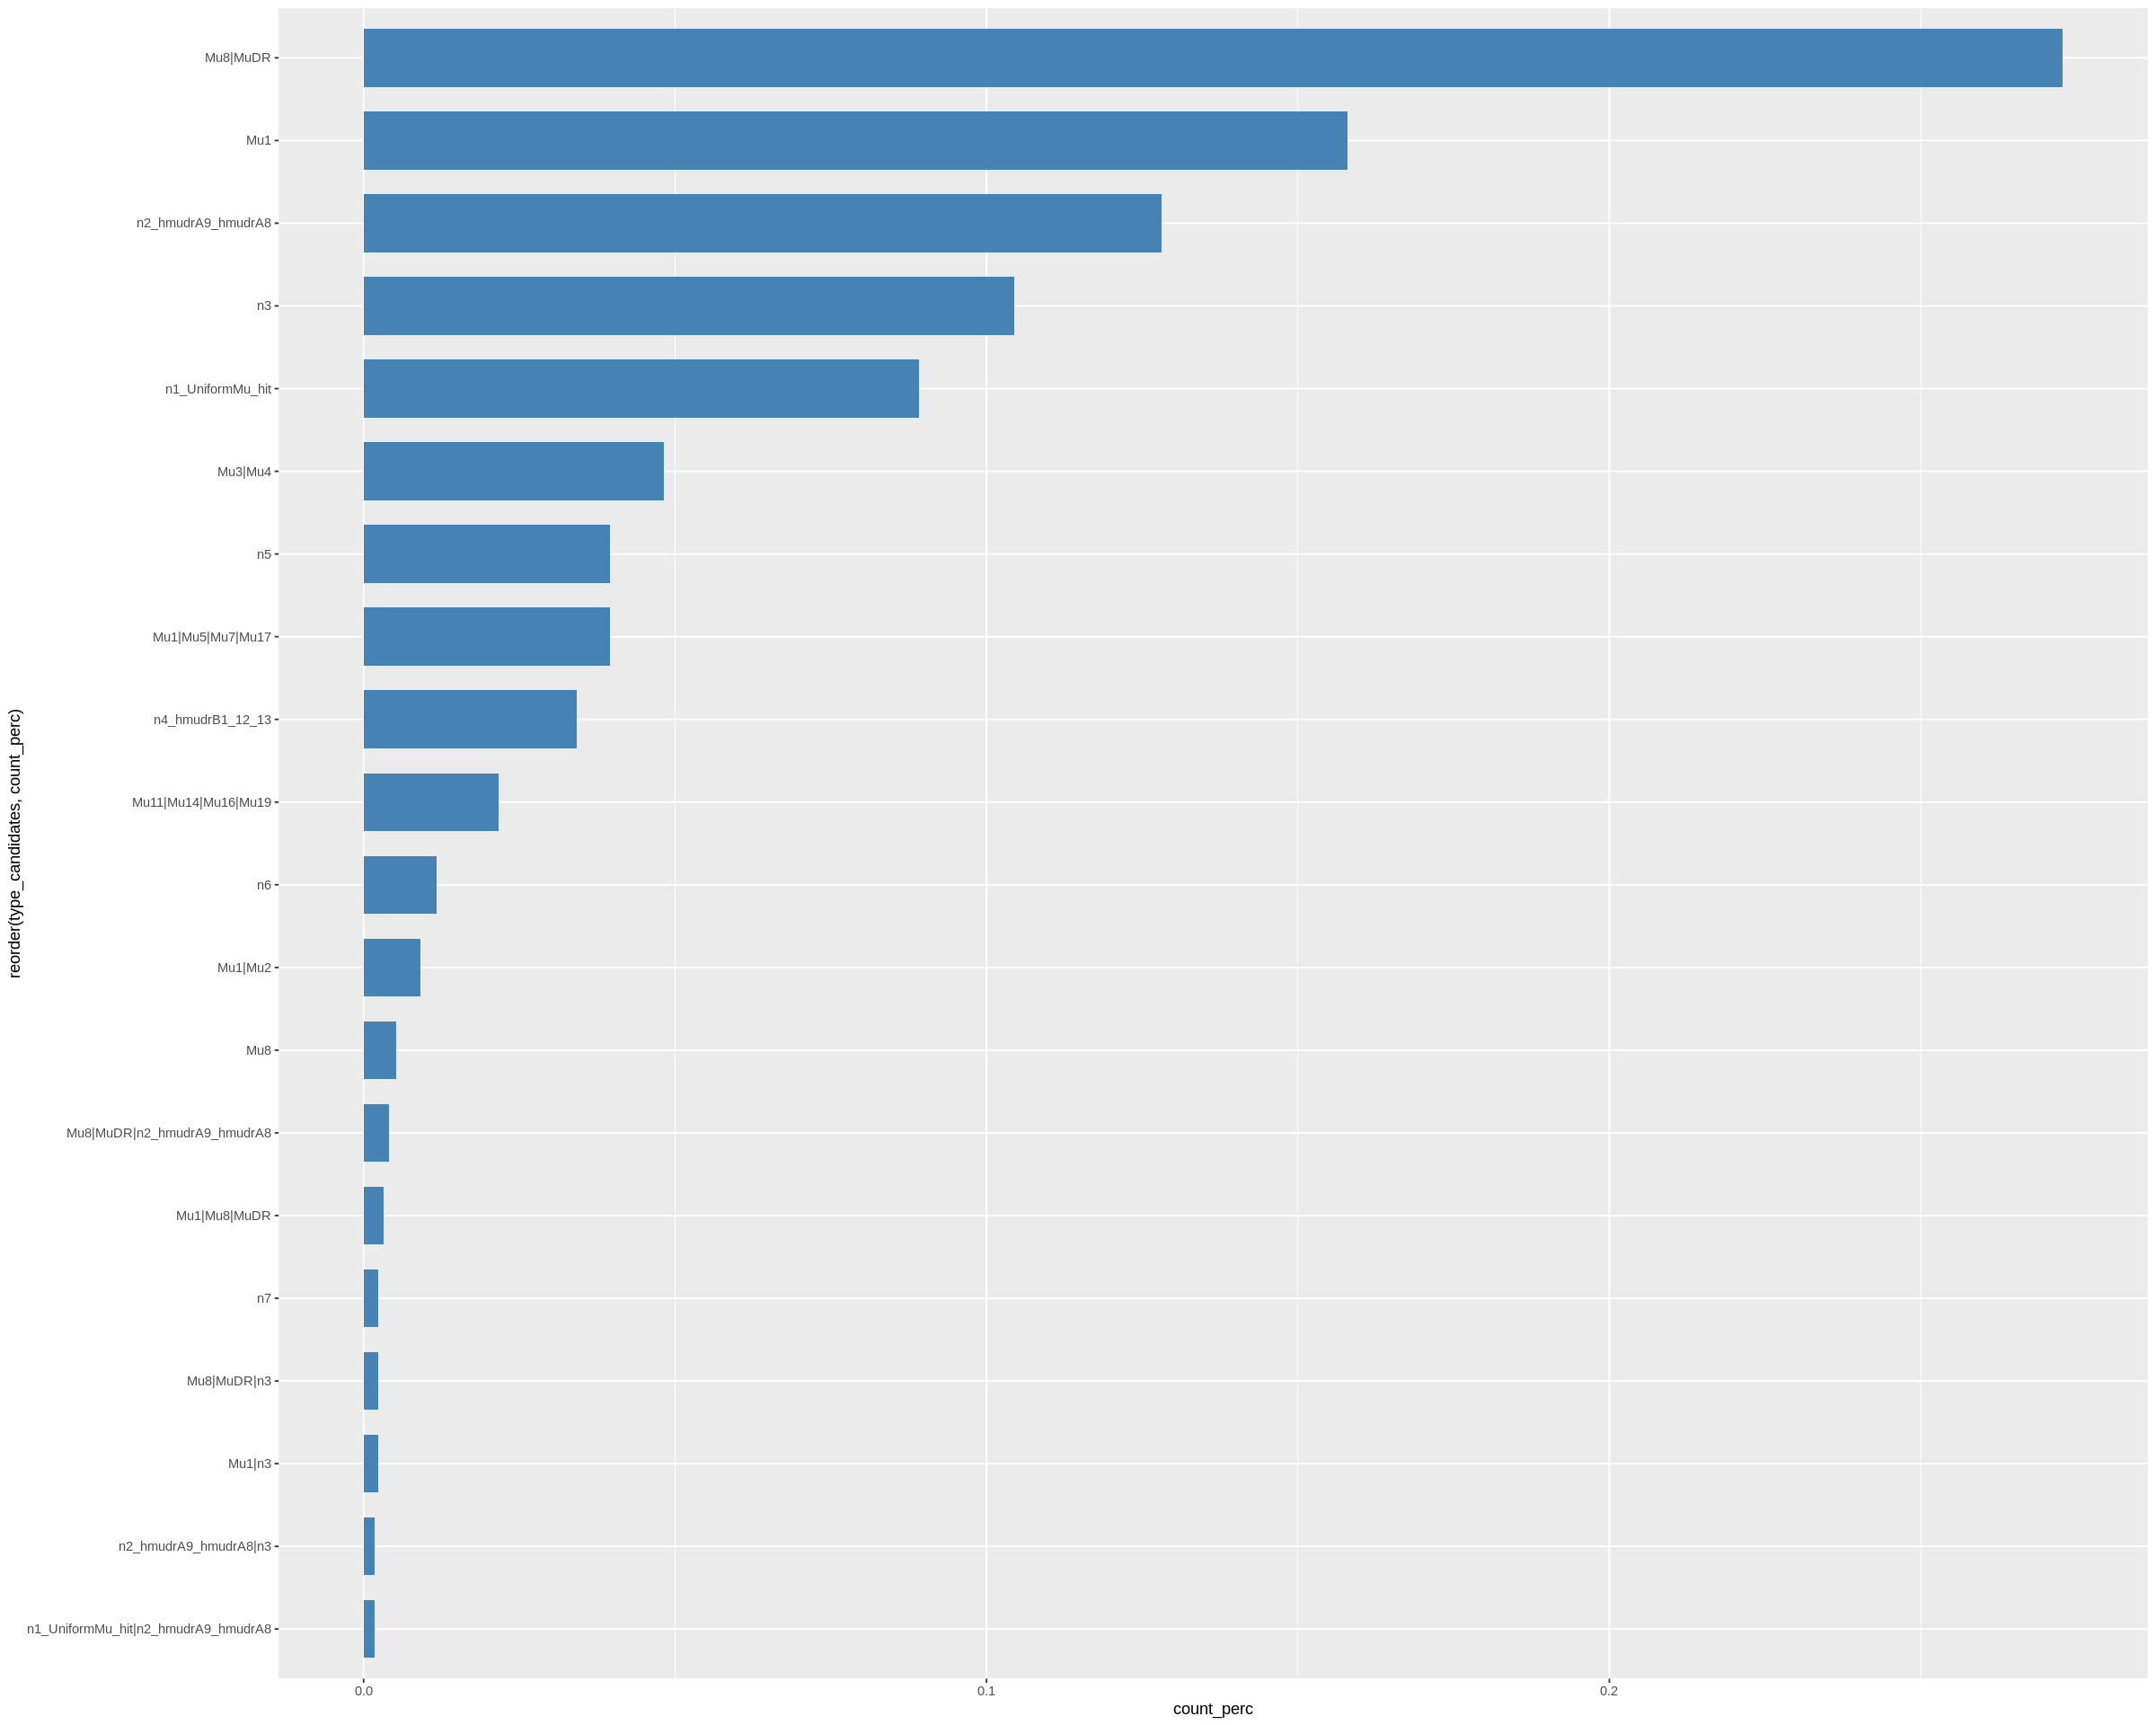

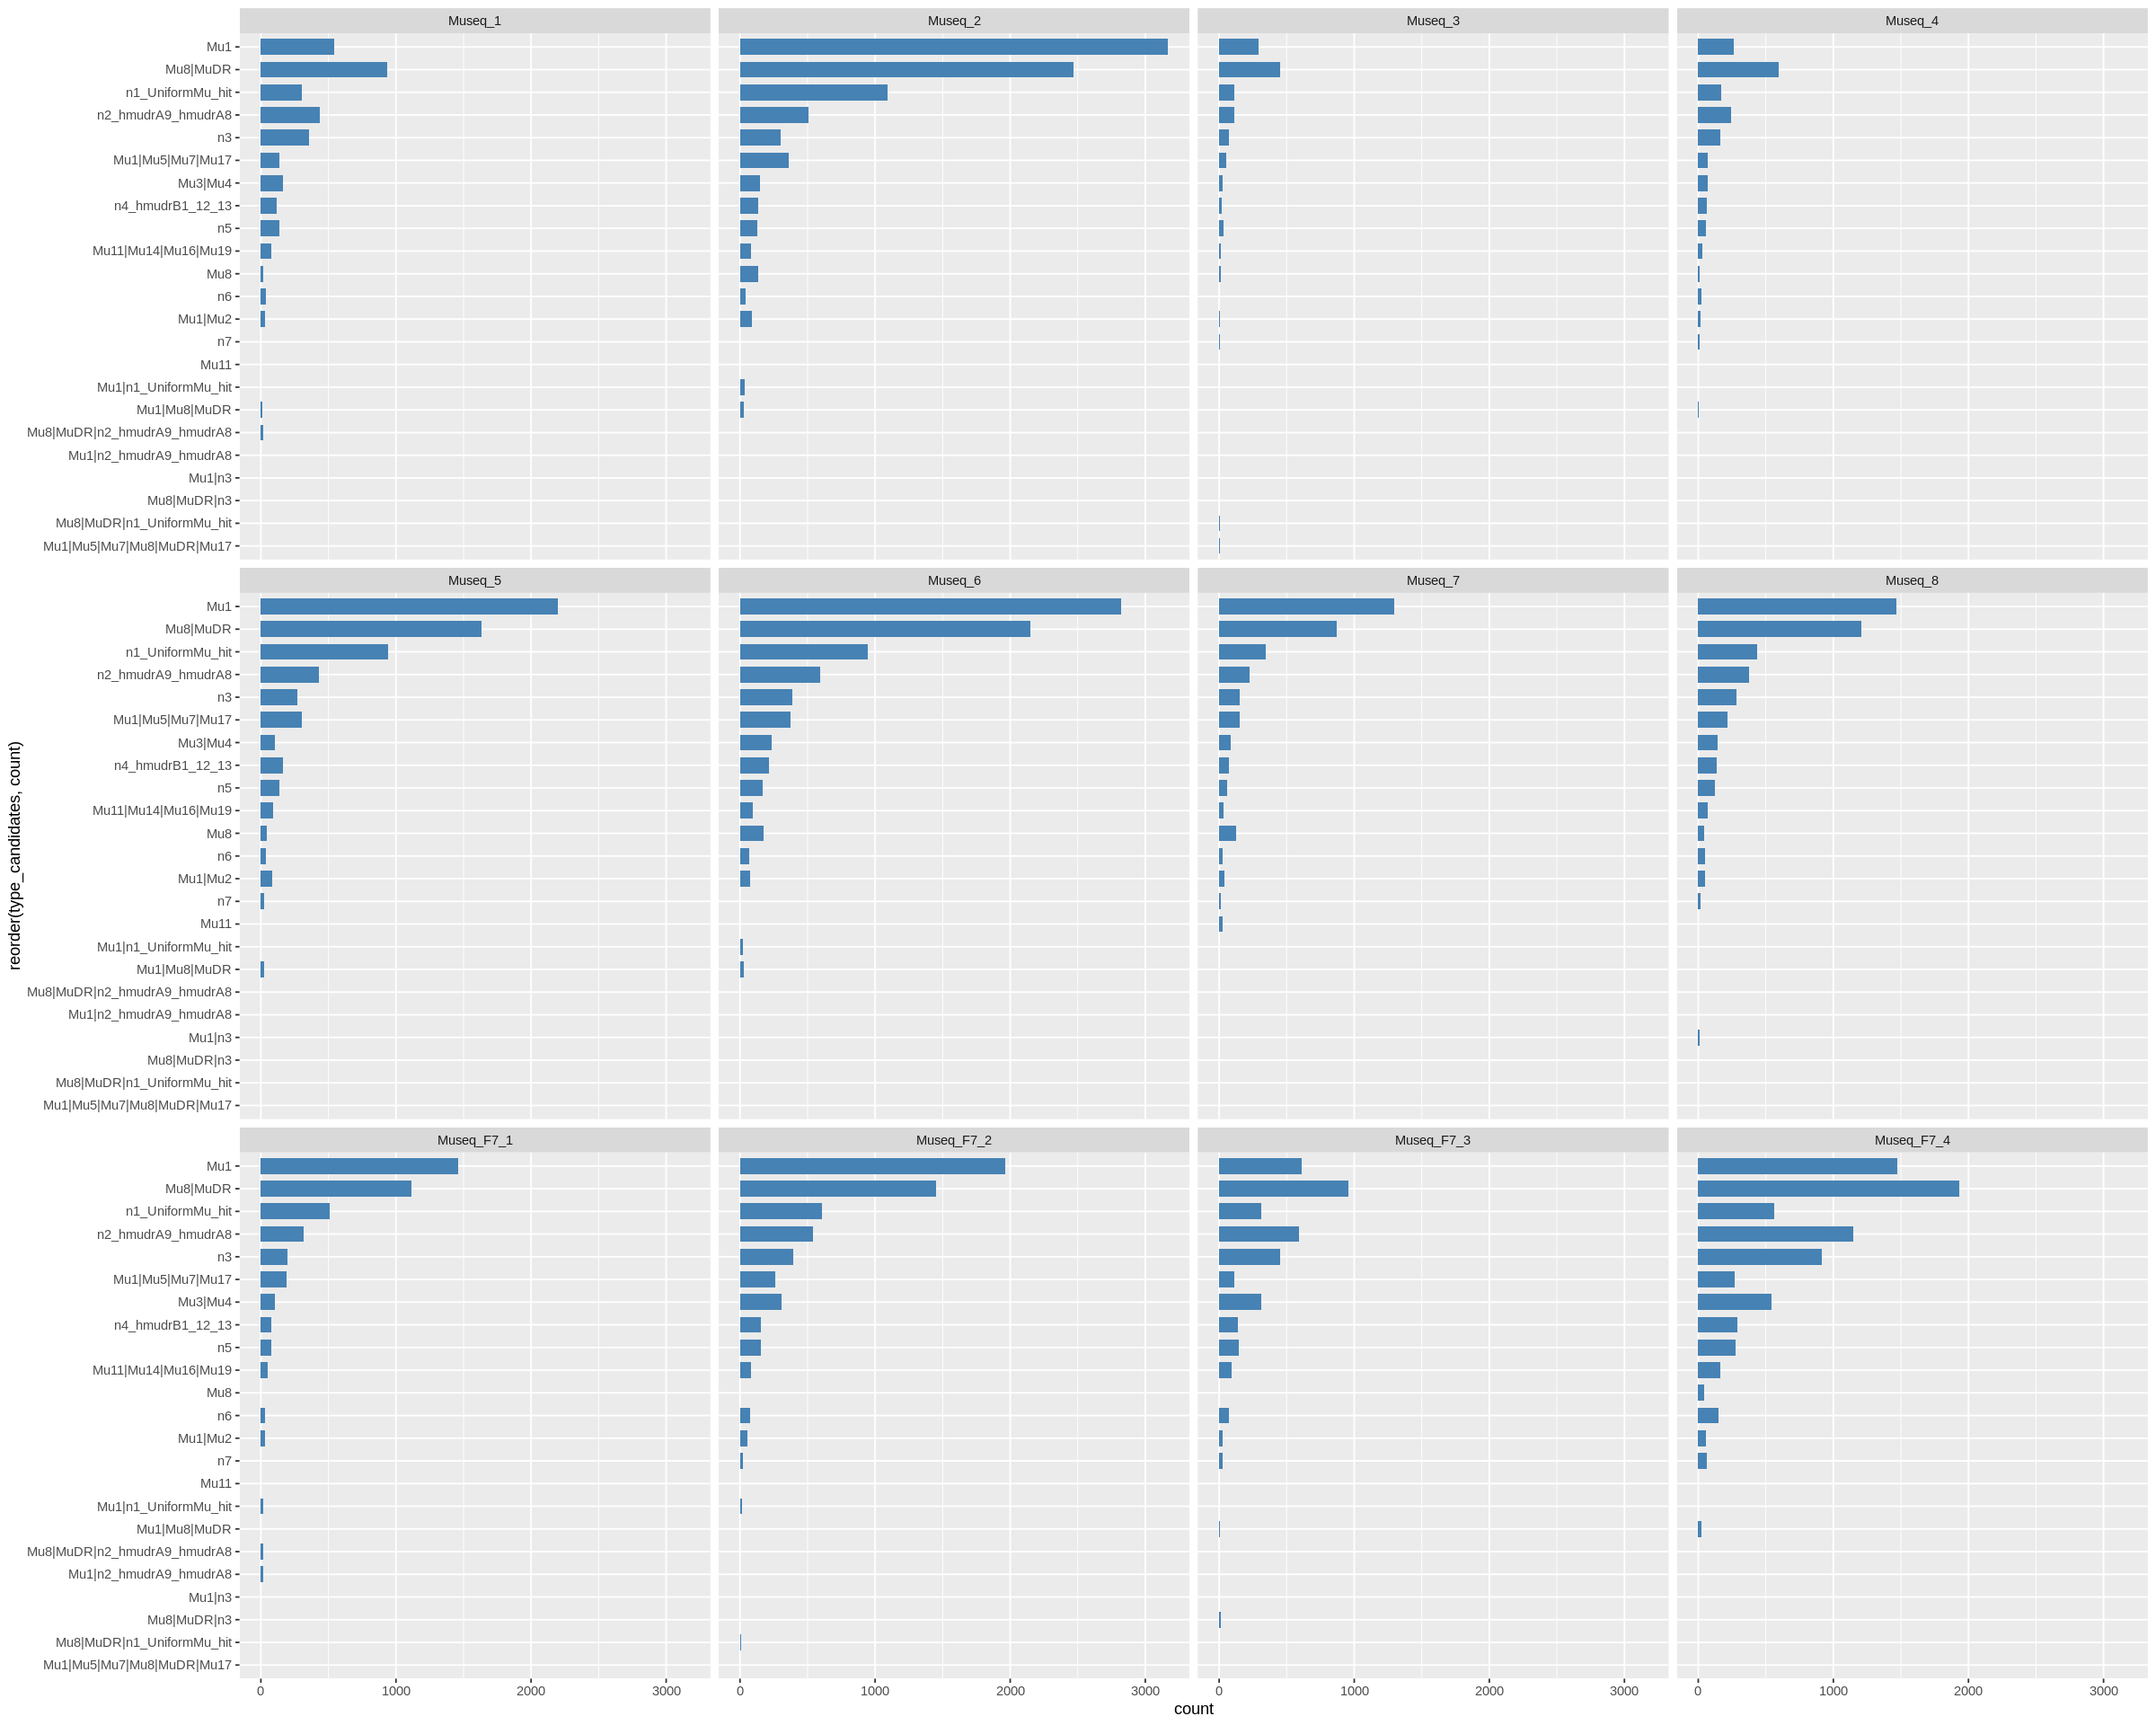

In [9]:
options(repr.plot.width=20, repr.plot.height=16)


all_Mu_merged %>%
  filter(lib == "Museq_1") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  head(n = 20) %>%
  #plotting
  #quick tips on reordering bars; https://sebastiansauer.github.io/ordering-bars/
  ggplot(., aes(x= reorder(type_candidates, -count), y=count)) +
    geom_col(fill = "darkblue") +
    xlab("Most likely subtype/element") +
    ylab("Frequency") +
#    title("ddd") +
    theme(axis.text.y=element_text(size=12, face="bold"),
          axis.text.x=element_text(size=12, face="bold", angle = 315, hjust = 0),
          axis.title=element_text(size=20,face="bold"),
          plot.margin = unit(c(1,2,1,1), "cm"))


all_Mu_merged %>%
  filter(lib == "Museq_1") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  head(n=20) %>% 
  ggplot(., aes(x = reorder(type_candidates, count), y= count)) +
    geom_bar(stat = "identity", width=0.7, fill="steelblue") +
    coord_flip()

all_Mu_merged %>%
  filter(lib == "Museq_F7_1") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  head(n=20) %>% 
  ggplot(., aes(x = reorder(type_candidates, count), y= count)) +
    geom_bar(stat = "identity", width=0.7, fill="steelblue") +
    coord_flip()

#or percentage
all_Mu_merged %>%
  filter(lib == "Museq_1") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  mutate(count_perc = count/sum(.$count)) %>%
  head(n=20) %>%
    ggplot(., aes(x = reorder(type_candidates, count_perc), y= count_perc)) +
      geom_bar(stat = "identity", width=0.7, fill="steelblue") +
      coord_flip()


all_Mu_merged %>%
#  filter(lib != "Museq_3") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  slice(1:15) %>% 
  ggplot(., aes(x = reorder(type_candidates, count), y= count)) +
    geom_bar(stat = "identity", width=0.7, fill="steelblue") +
    coord_flip() + 
    facet_wrap(~lib)

### Candidates determination for TE typing validation

In [10]:
all_Mu_merged %>%
#  filter(lib == "Mu1") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  slice(1:15) %>%
  pull(type_candidates)

[1] "Mu1"                 "Mu8|MuDR"            "n1_UniformMu_hit"   
 [4] "n2_hmudrA9_hmudrA8"  "n3"                  "Mu1|Mu5|Mu7|Mu17"   
 [7] "Mu3|Mu4"             "n4_hmudrB1_12_13"    "n5"                 
[10] "Mu11|Mu14|Mu16|Mu19" "n6"                  "Mu8"                
[13] "Mu1|Mu2"             "n7"                  "Mu1|Mu8|MuDR"

In [225]:
# functioning the candidate determination

best_candidate_determination <- function(mu_species, read_support_threshold, max_output_rows) {

  best_candidates <- all_Mu_merged %>%
    #exclude B73 lib 3 - Col background
    filter(lib != "Museq_3") %>%
    filter(StartReads >= read_support_threshold) %>%
    filter(EndReads >= read_support_threshold) %>%
    filter(perc_best_type_of_types >= 0.2) %>%
    filter(type_candidates == mu_species) %>%
    group_by(lib, Chr, GeneStart, InsertionStart, GeneID, type_candidates)  %>%
    tally() %>%
    arrange(desc(n)) %>%
    filter(n >= 2)
  nrow(best_candidates)
  
  final_best_candidates <- all_Mu_merged %>%
    dplyr::right_join(., best_candidates, by = c("lib", "Chr", "GeneStart", "InsertionStart", "GeneID", "type_candidates")) %>%
    group_by(lib, Chr, GeneStart, InsertionStart, GeneID, type_candidates) %>%
    #merge sample information so we have each intersection on every line
    mutate(Samples = paste0(Sample, collapse = "|")) %>%
    #also retain stock information
    group_by(lib, Chr, GeneStart, InsertionStart, GeneID, type_candidates, Samples, stock) %>%
    #compute total reads & percentage of best type association
    summarise(TotalReads = sum(TotalReads), perc_best_type_of_types = sum(perc_best_type_of_types)/2) %>%
    mutate(frac_proof_reads = TotalReads*perc_best_type_of_types) %>%
    arrange(desc(perc_best_type_of_types))
  
  #if more than 20 insertion candidates pass threshold, reduce total number to 20
  if (max_output_rows != "all" & nrow(final_best_candidates) > max_output_rows) {
    final_best_candidates <- head(final_best_candidates, n=max_output_rows)
  }
      
  return(final_best_candidates)

}    

In [117]:
Mu1_candidates <- best_candidate_determination(mu_species = "Mu1", read_support_threshold = 5, max_output_rows = 20)
Mu8_MuDR_candidates <- best_candidate_determination(mu_species = "Mu8|MuDR", read_support_threshold = 5, max_output_rows = 20)
n1_UniformMu_hit_candidates <- best_candidate_determination(mu_species = "n1_UniformMu_hit", read_support_threshold = 5, max_output_rows = 20)
n2_hmudrA9_hmudrA8_candidates <- best_candidate_determination(mu_species = "n2_hmudrA9_hmudrA8", read_support_threshold = 5, max_output_rows = 20)
n3_candidates <- best_candidate_determination(mu_species = "n3", read_support_threshold = 5, max_output_rows = 20)
Mu1_Mu5_Mu7_Mu17_candidates <- best_candidate_determination(mu_species = "Mu1|Mu5|Mu7|Mu17", read_support_threshold = 5, max_output_rows = 20)
Mu3_Mu4_candidates <- best_candidate_determination(mu_species = "Mu3|Mu4", read_support_threshold = 5, max_output_rows = 20)
n4_hmudrB1_12_13_candidates <- best_candidate_determination(mu_species = "n4_hmudrB1_12_13", read_support_threshold = 5, max_output_rows = 20)
n5_candidates <- best_candidate_determination(mu_species = "n5", read_support_threshold = 5, max_output_rows = 20)
Mu8_candidates <- best_candidate_determination(mu_species = "Mu8", read_support_threshold = 5, max_output_rows = 20)
Mu11_Mu14_Mu16_Mu19_candidates <- best_candidate_determination(mu_species = "Mu11|Mu14|Mu16|Mu19", read_support_threshold = 5, max_output_rows = 20)
Mu1_Mu2_candidates <- best_candidate_determination(mu_species = "Mu1|Mu2", read_support_threshold = 5, max_output_rows = 20)
n6_candidates <- best_candidate_determination(mu_species = "n6", read_support_threshold = 5, max_output_rows = 20)
#read support set to 2 since no good cases where both ROW+COL pool support
n7_candidates <- best_candidate_determination(mu_species = "n7", read_support_threshold = 2, max_output_rows = 20)

`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID', 'type_candidates',
'Samples'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID', 'type_candidates',
'Samples'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID', 'type_candidates',
'Samples'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID', 'type_candidates',
'Samples'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID', 'type_candidates',
'Samples'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID', 'type_candidates',
'Samples'. You can override using the `.groups` ar

In [78]:
head(Mu1_candidates)

lib,Chr,GeneStart,InsertionStart,GeneID,type_candidates,Samples,stock,TotalReads,perc_best_type_of_types,frac_proof_reads
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
Museq_6,3,158081035,158082624,Zm00001eb142390,Mu1,Row_06|Col_15,B-785,24,0.5419580,13.00699
Museq_6,10,143196860,143202521,Zm00001eb430350,Mu1,Row_18|Col_01,C-137,21,0.5272727,11.07273
Museq_F7_1,1,16122256,16122536,Zm00001eb005710,Mu1,Row_02|Col_23,F-0047,43,0.5268817,22.65591
Museq_5,7,142050974,142052450,Zm00001eb317510,Mu1,Row_19|Col_22,B-0527,44,0.5205882,22.90588
Museq_5,7,142051798,142052450,Zm00001eb317520,Mu1,Row_19|Col_22,B-0527,44,0.5205882,22.90588
Museq_5,1,28542661,28542655,Zm00001eb009240,Mu1,Row_20|Col_24,B-0553,34,0.5073260,17.24908


In [85]:
#list for excel sheet
candidate_list <- list(
  "Mu1_candidates" = Mu1_candidates,
  "Mu8_MuDR_candidates" = Mu8_MuDR_candidates,
  "n1_UniformMu_hit_candidates" = n1_UniformMu_hit_candidates,
  "n2_hmudrA9_hmudrA8_candidates" = n2_hmudrA9_hmudrA8_candidates,
  "n3_candidates" = n3_candidates,
  "Mu1_Mu5_Mu7_Mu17_candidates" = Mu1_Mu5_Mu7_Mu17_candidates,
  "Mu3_Mu4_candidates" = Mu3_Mu4_candidates,
  "n4_hmudrB1_12_13_candidates" = n4_hmudrB1_12_13_candidates,
  "n5_candidates" = n5_candidates,
  "Mu8_candidates" = Mu8_candidates,
  "Mu11_Mu14_Mu16_Mu19_candidates" = Mu11_Mu14_Mu16_Mu19_candidates,
  "Mu1_Mu2_candidates" = Mu1_Mu2_candidates,
  "n6_candidates" = n6_candidates,
  "n7_candidates"= n7_candidates
)

#writing to excel sheet
write.xlsx(x = candidate_list, file = "TE_typing_validation_candidates.xlsx", overwrite = TRUE)

#### Testing whether putative novel Mu species' TIRs are infact side-specific combinations

In [12]:
SAM_object <- fread("../../results/dedup_sam/Row_20.dedup.sam", 
                    select=c(1,2,3,4,10), 
                    sep = "\t", 
                    header=FALSE, 
                    fill=TRUE)

SAM_object %>%
  filter(V4 == 111759837)

V1,V2,V3,V4,V10
<chr>,<int>,<chr>,<int>,<chr>
HISEQ:638:CC9MVANXX:6:1112:15645:85835,163,3,111759837,CCTCCAGCCACCTCCCTCGGCTTCTTCTTCCCATCCGACCGCCCCTGCTCATCTTCCTACCTCCCGCAGCTCCCAGCCGAGCGGTTCTCTCCCCCT
HISEQ:638:CC9MVANXX:6:1201:20085:58466,163,3,111759837,CCTCCAGCCACCTCCCTCGGCTTCTTCTTCCCATCCGACCGCCCCTGCTCATCTTCCT
HISEQ:638:CC9MVANXX:6:2209:4603:82293,163,3,111759837,CCTCCAGCCACCTCCCTCGGCTTCTTCTTCCCATCCGACCGCCCCTGCTCATCTTCCTACCTCCCGCAGCTCCCAGCCGAGCGGTTCTCTCCCCCT
HISEQ:638:CC9MVANXX:6:2303:18636:14004,163,3,111759837,CCTCCAGCCACCTCCCTCGGCTTCTTCTTCCCATCCGACCGCCCCTGCTCATCTTCCTACCTCCCGCAGCTCCCAGCCGAGCGGTTCTCTCCCCCT
HISEQ:638:CC9MVANXX:6:1201:20085:58466,83,3,111759837,CCTCCAGCCACCTCCCTCGGCTTCTTCTTCCCATCCGACCGCCCCTGCTCATCTTCCT
HISEQ:638:CC9MVANXX:6:1210:16183:68527,113,3,111759837,CCTCCAGCCACCTCCCTCGGCTTCTTCTTCCCATCCGACCGCCCCTGCTCATCTTCCT


In [105]:
head(SAM_object)

V1,V2,V3,V4,V10
<chr>,<int>,<chr>,<int>,<chr>
HISEQ:638:CC9MVANXX:6:2115:6398:10653,99,1,35204,CAAGCCTGACCACGGCGTGGTGCCGCTCCTCGAGAGCTTGGGAATGCGTCTCTCCTCGGCCAAACTCATCGCGCCTTACGTCGCGGCTGCGGGCCTTACTGTGCTGATT
HISEQ:638:CC9MVANXX:6:2115:6398:10653,147,1,35222,GGTGCCGCTCCTCGAGAGCTTGGGAATGCGTCTCTCCTCGGCCAAACTCATCGCGCCTTACGTCGCGGCTGCGGGCCTTACTGTGCTGATTGATAG
HISEQ:638:CC9MVANXX:6:1313:12133:41846,99,1,35253,CTCTCCTCGGCCAAACTCATCGCGCCTTACGTCGCGGCTGCGGGCCTTACTGTGCTGATTGATAG
HISEQ:638:CC9MVANXX:6:1313:12133:41846,147,1,35253,CTCTCCTCGGCCAAACTCATCGCGCCTTACGTCGCGGCTGCGGGCCTTACTGTGCTGATTGATAG
HISEQ:638:CC9MVANXX:6:1309:2935:74829,99,1,35274,GCGCCTTACGTCGCGGCTGCGGGCCTTACTGTGCTGATTGATAG
HISEQ:638:CC9MVANXX:6:1309:2935:74829,147,1,35274,GCGCCTTACGTCGCGGCTGCGGGCCTTACTGTGCTGATTGATAG


Warning message in cor(., method = "pearson"):
“the standard deviation is zero”


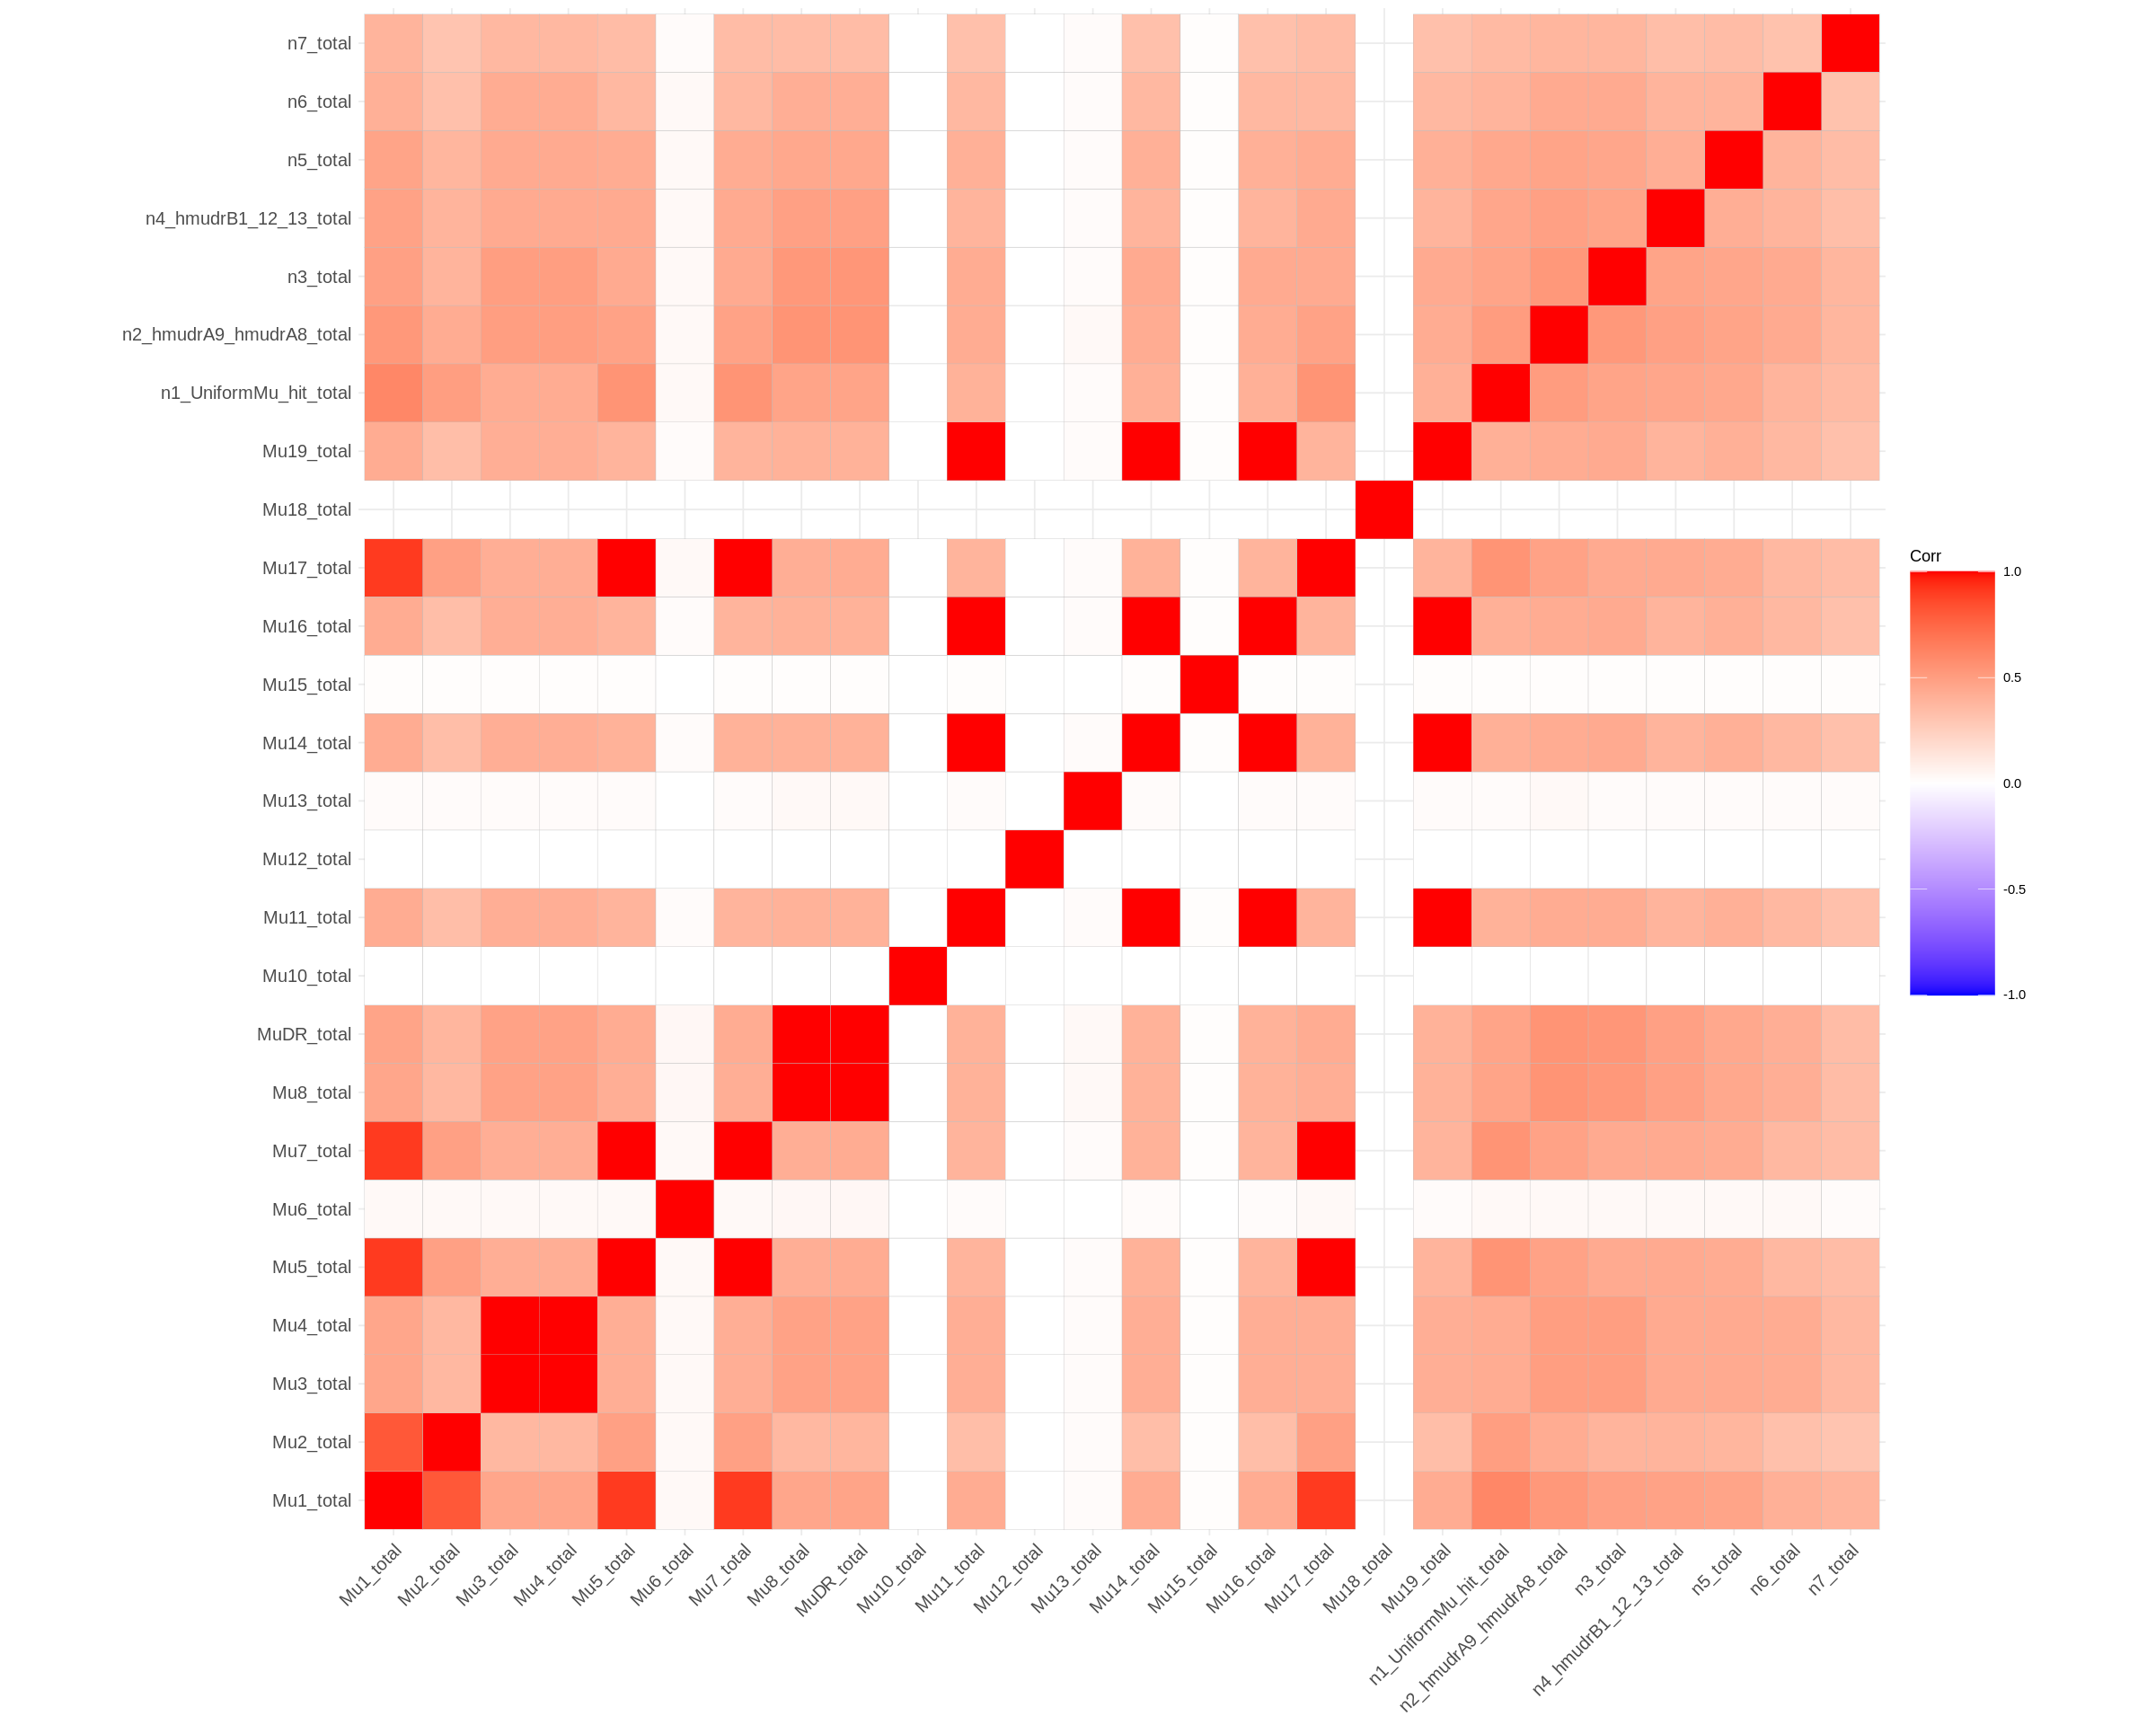

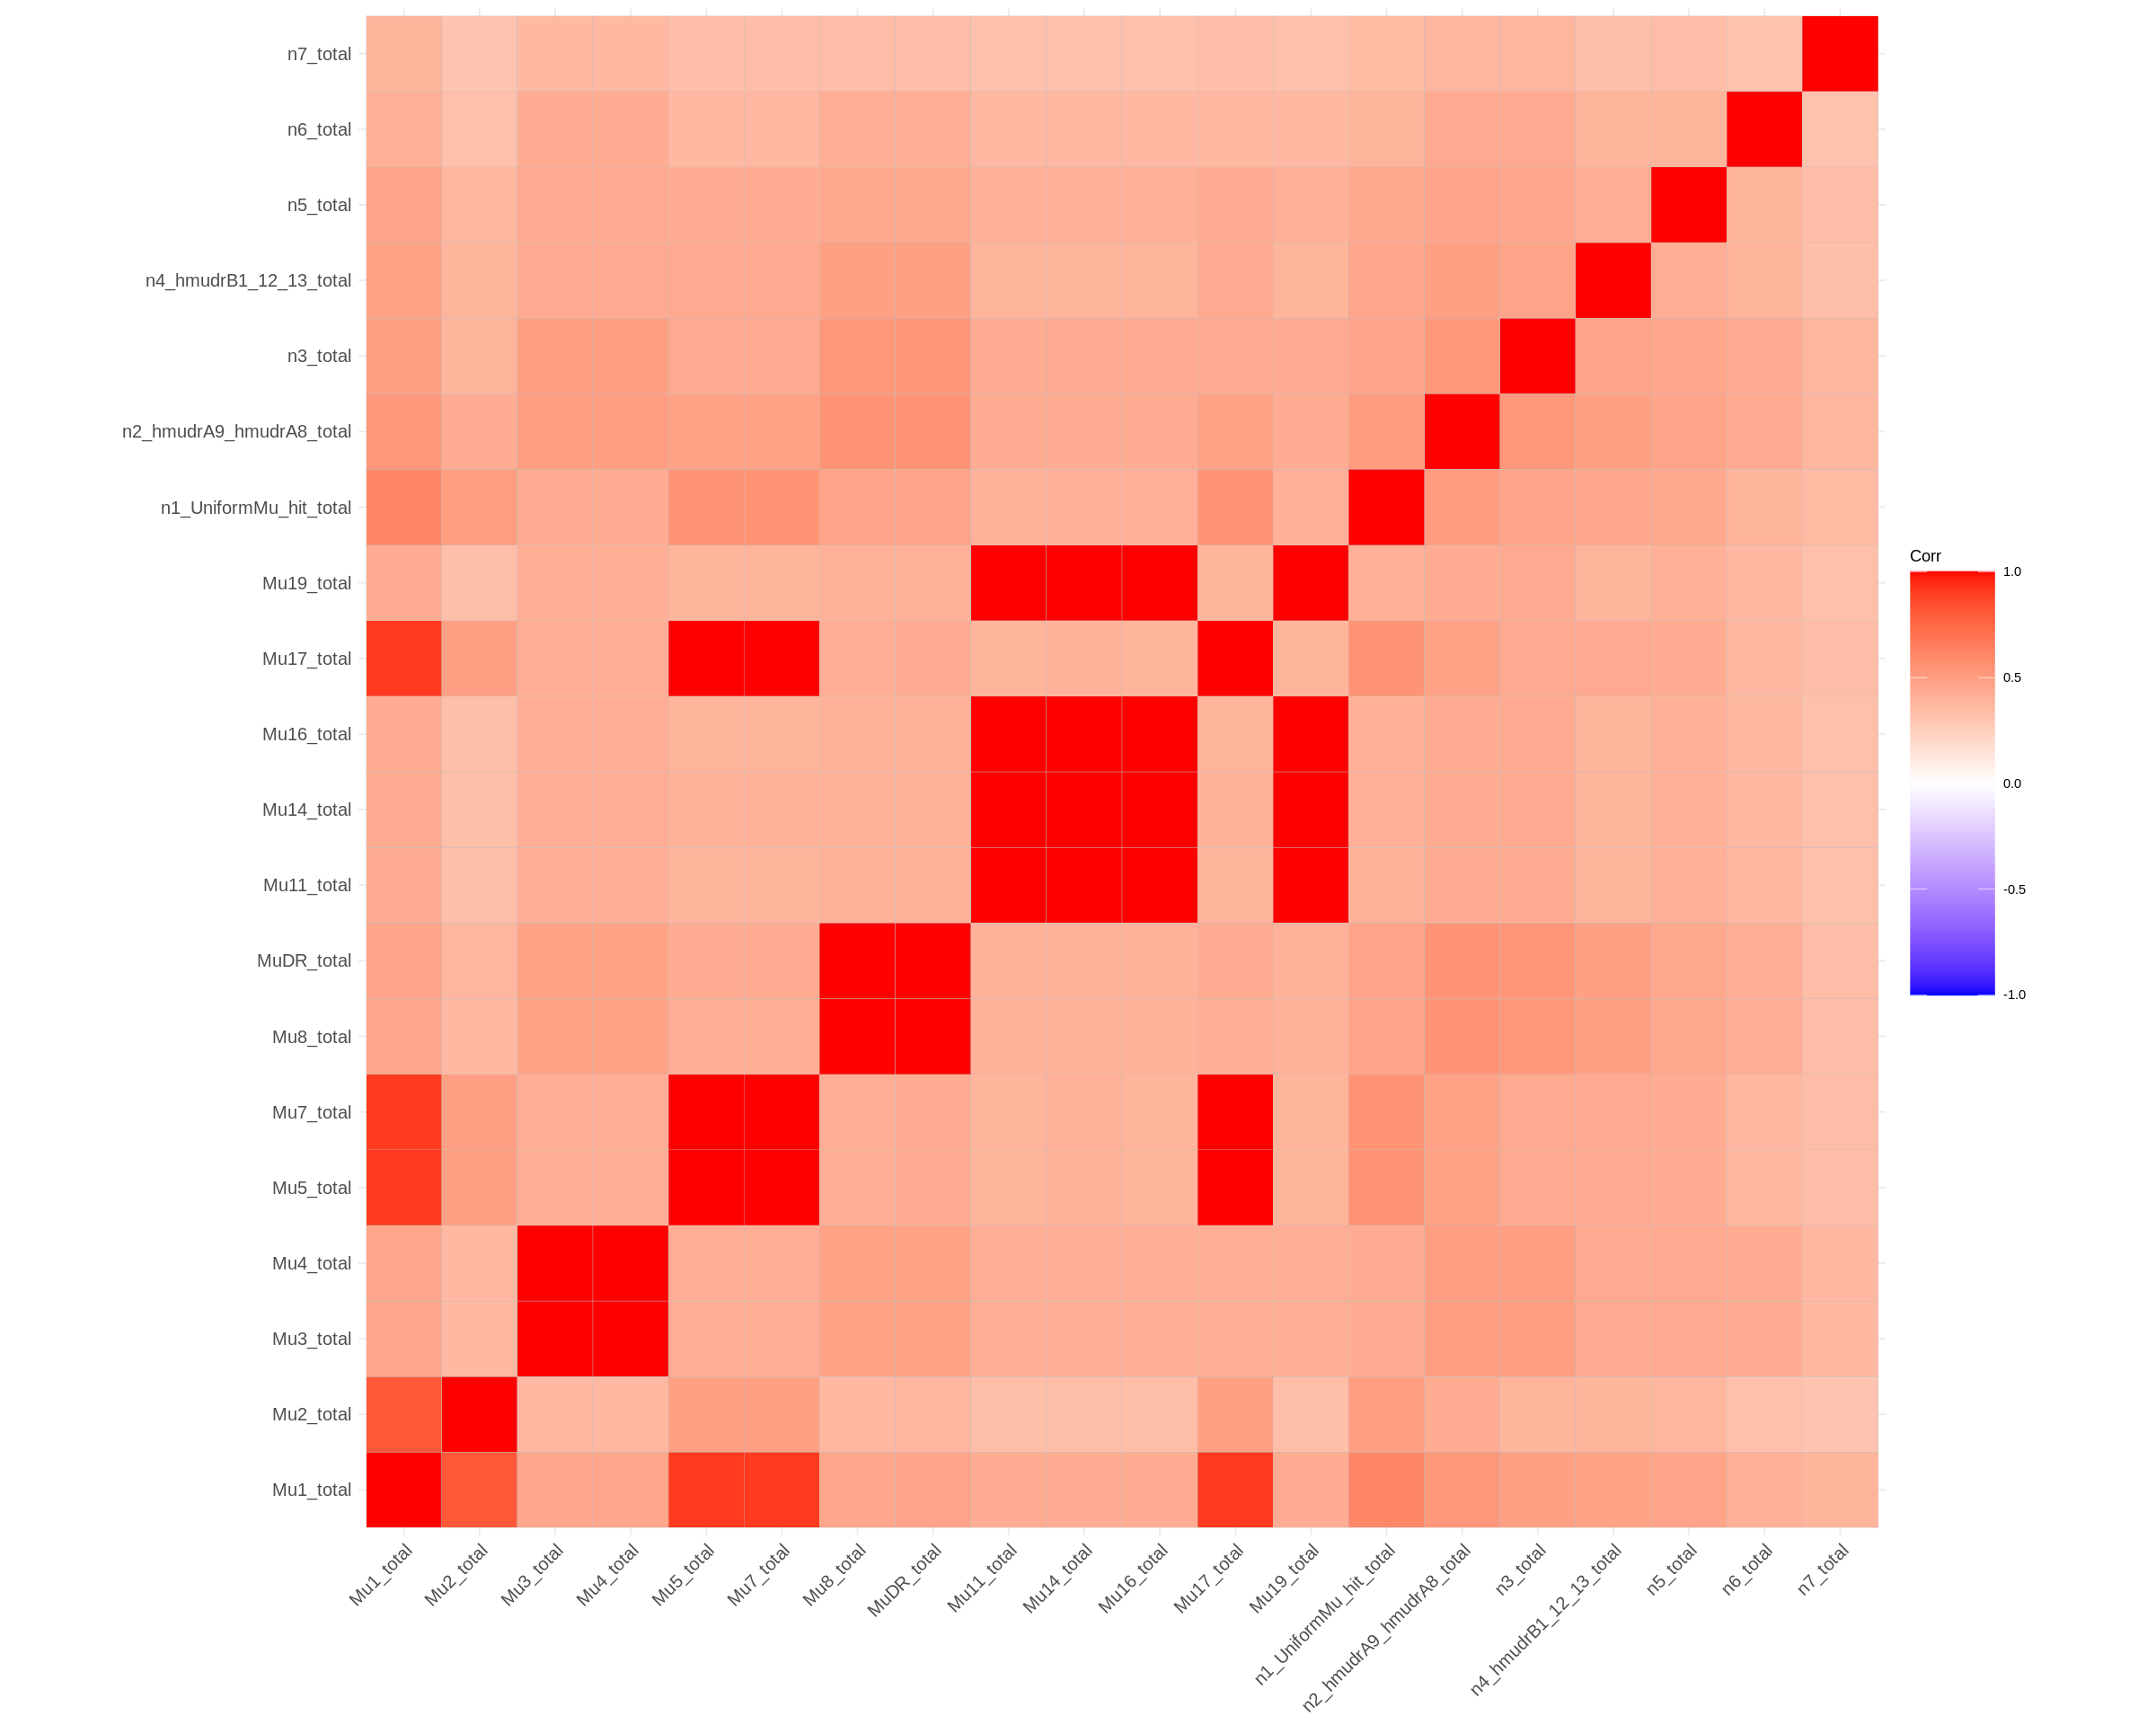

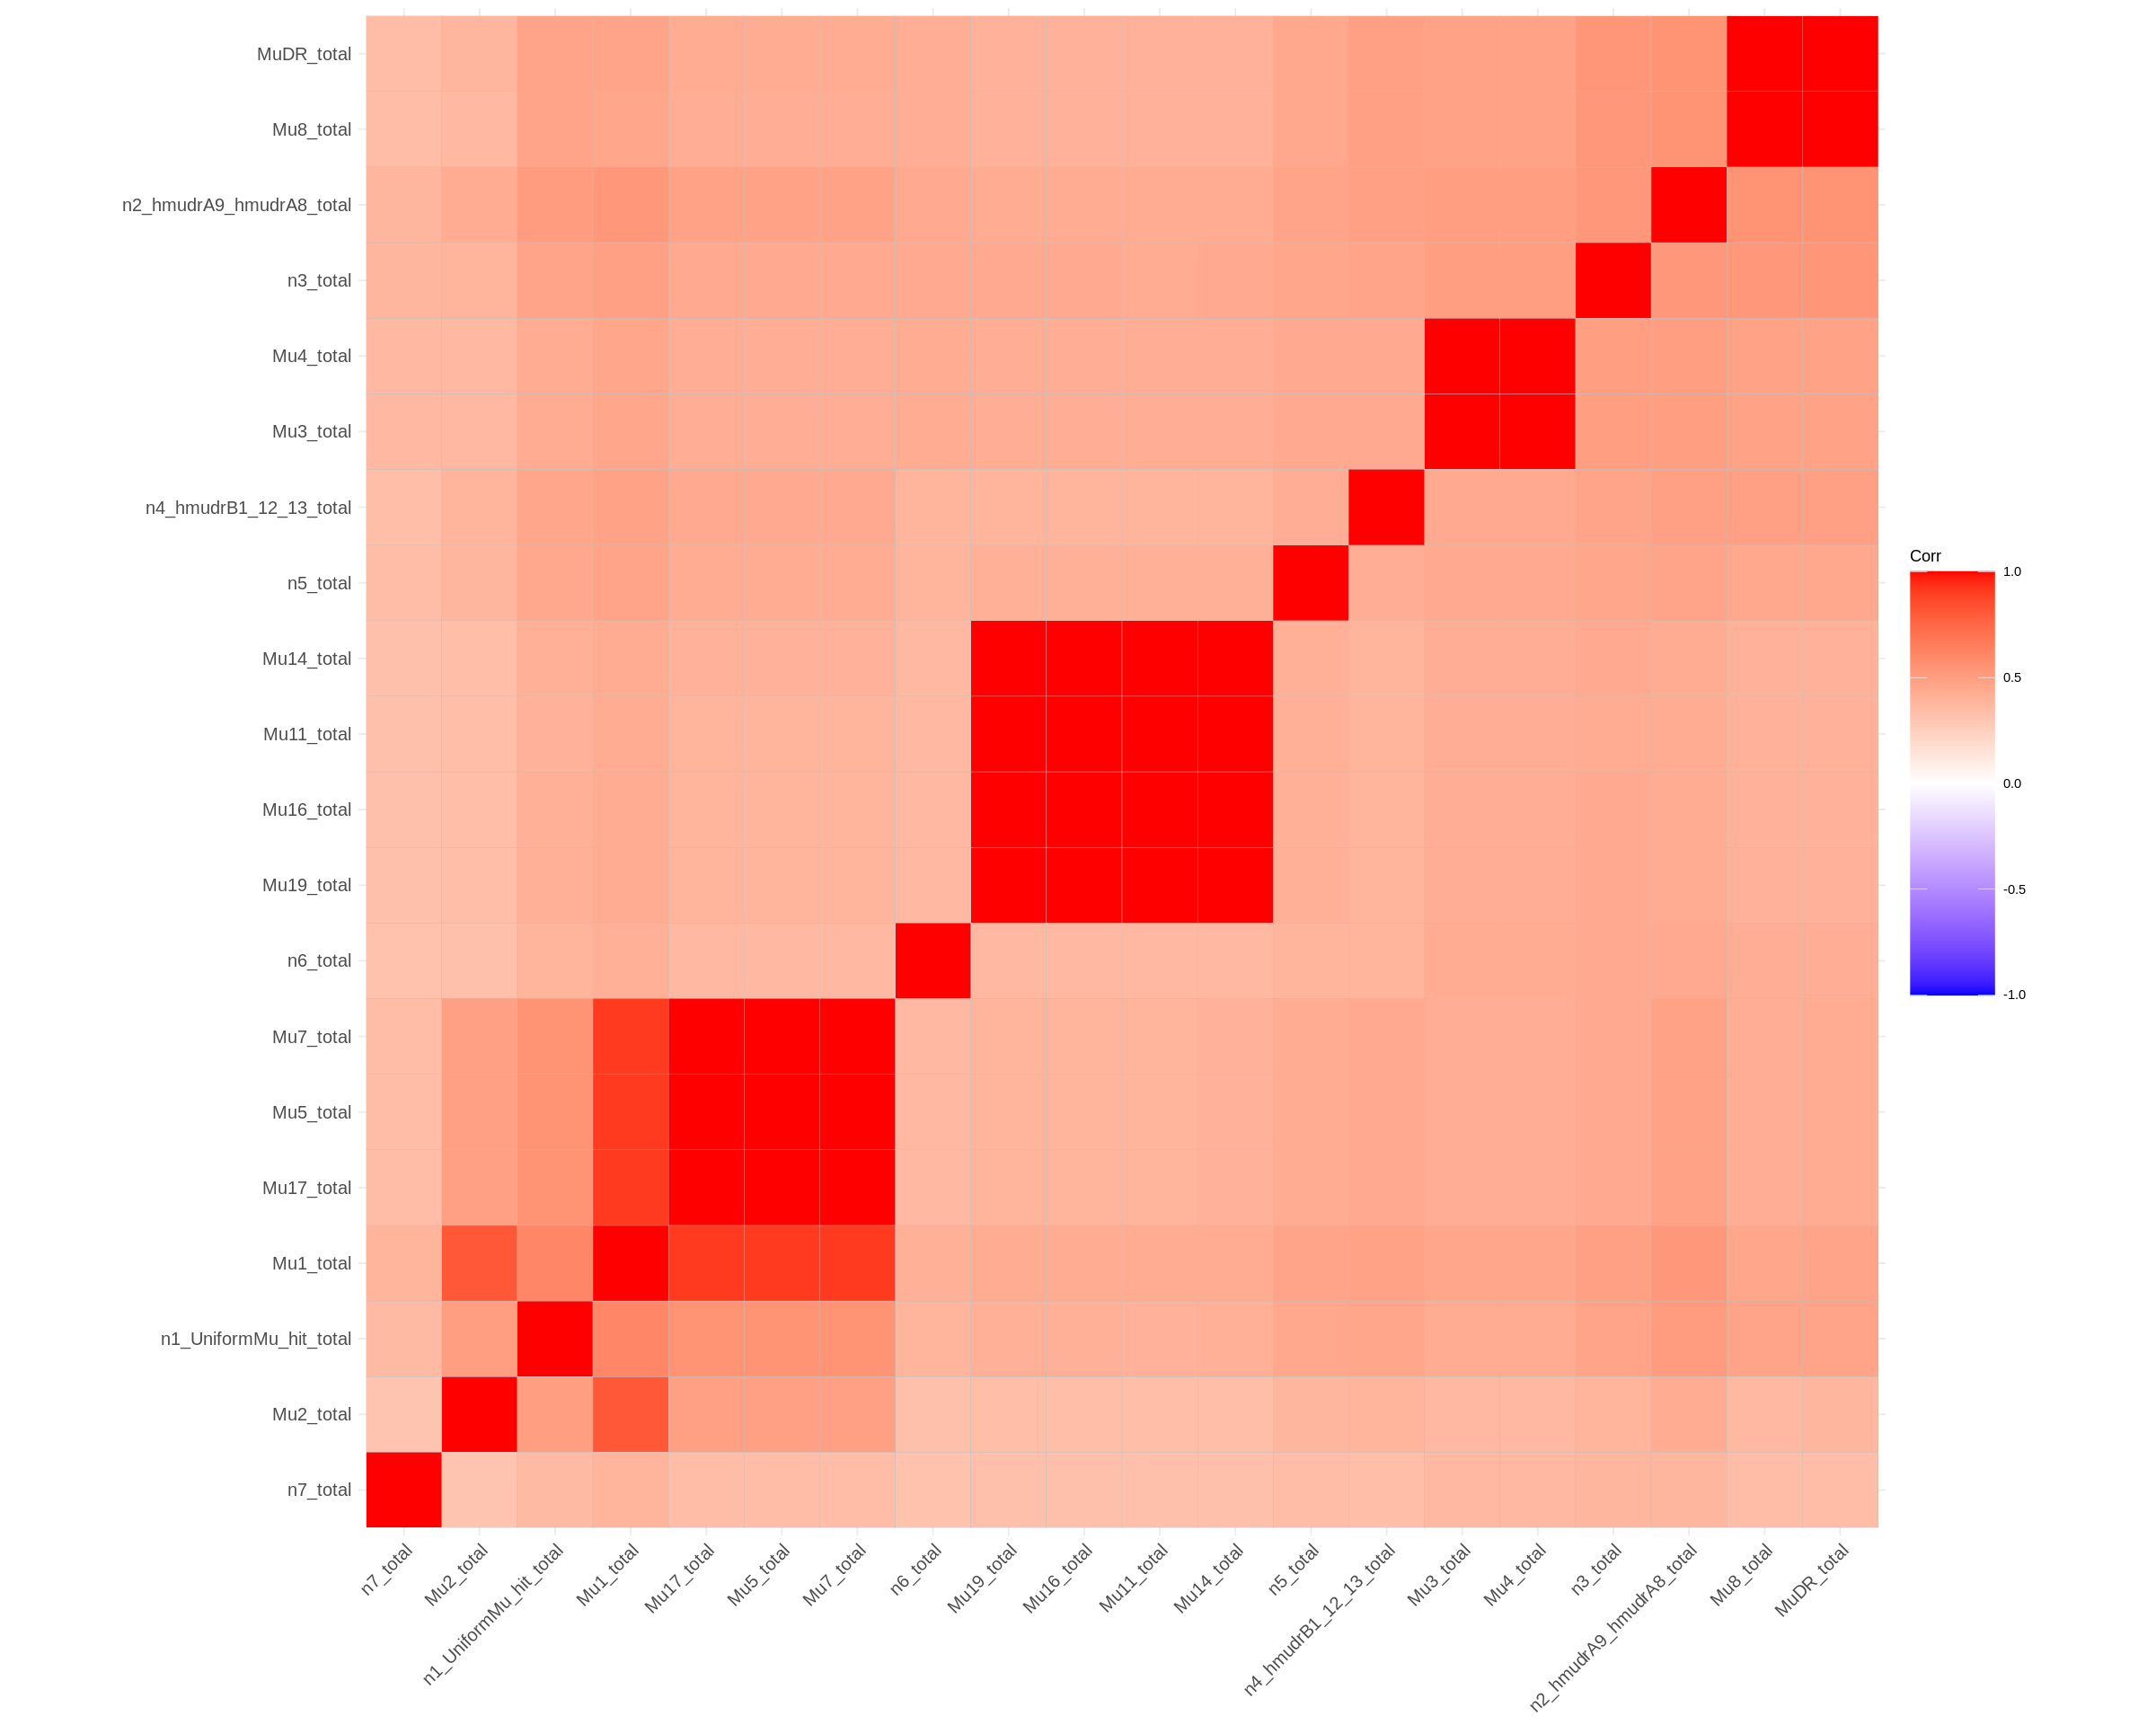

In [13]:
#why not correlation?
B73_Mu_merged %>%
#    filter(lib != "Museq_3") %>%
    filter(StartReads >= 5) %>%
    filter(EndReads >= 5) %>%
    select(Mu1_total,
           Mu2_total,
           Mu3_total,
           Mu4_total,
           Mu5_total,
           Mu6_total,
           Mu7_total,
           Mu8_total,
           MuDR_total,
           Mu10_total,
           Mu11_total,
           Mu12_total,
           Mu13_total,
           Mu14_total,
           Mu15_total,
           Mu16_total,
           Mu17_total,
           Mu18_total,
           Mu19_total,
           n1_UniformMu_hit_total, 
           n2_hmudrA9_hmudrA8_total,
           n3_total,
           n4_hmudrB1_12_13_total,
           n5_total,
           n6_total,
           n7_total) %>%
    cor(method = "pearson") %>% 
      ggcorrplot() +
        theme(legend.key.size = unit(2, 'cm'))


B73_Mu_merged %>%
#    filter(lib != "Museq_3") %>%
    filter(StartReads >= 5) %>%
    filter(EndReads >= 5) %>%
    select(Mu1_total,
           Mu2_total,
           Mu3_total,
           Mu4_total,
           Mu5_total,
#           Mu6_total,
           Mu7_total,
           Mu8_total,
           MuDR_total,
#           Mu10_total,
           Mu11_total,
#           Mu12_total,
#           Mu13_total,
           Mu14_total,
#           Mu15_total,
           Mu16_total,
           Mu17_total,
#           Mu18_total,
           Mu19_total,
           n1_UniformMu_hit_total, 
           n2_hmudrA9_hmudrA8_total,
           n3_total,
           n4_hmudrB1_12_13_total,
           n5_total,
           n6_total,
           n7_total) %>%
    cor(method = "pearson") %>% 
      ggcorrplot(hc.order = FALSE) +
        theme(legend.key.size = unit(2, 'cm'))


B73_Mu_merged %>%
#    filter(lib != "Museq_3") %>%
    filter(StartReads >= 5) %>%
    filter(EndReads >= 5) %>%
    select(Mu1_total,
           Mu2_total,
           Mu3_total,
           Mu4_total,
           Mu5_total,
#           Mu6_total,
           Mu7_total,
           Mu8_total,
           MuDR_total,
#           Mu10_total,
           Mu11_total,
#           Mu12_total,
#           Mu13_total,
           Mu14_total,
#           Mu15_total,
           Mu16_total,
           Mu17_total,
#           Mu18_total,
           Mu19_total,
           n1_UniformMu_hit_total, 
           n2_hmudrA9_hmudrA8_total,
           n3_total,
           n4_hmudrB1_12_13_total,
           n5_total,
           n6_total,
           n7_total) %>%
    cor(method = "pearson") %>% 
      ggcorrplot(hc.order = TRUE, hc.method = "complete") +
        theme(legend.key.size = unit(2, 'cm'))

Warning message in cor(., method = "pearson", ):
“the standard deviation is zero”


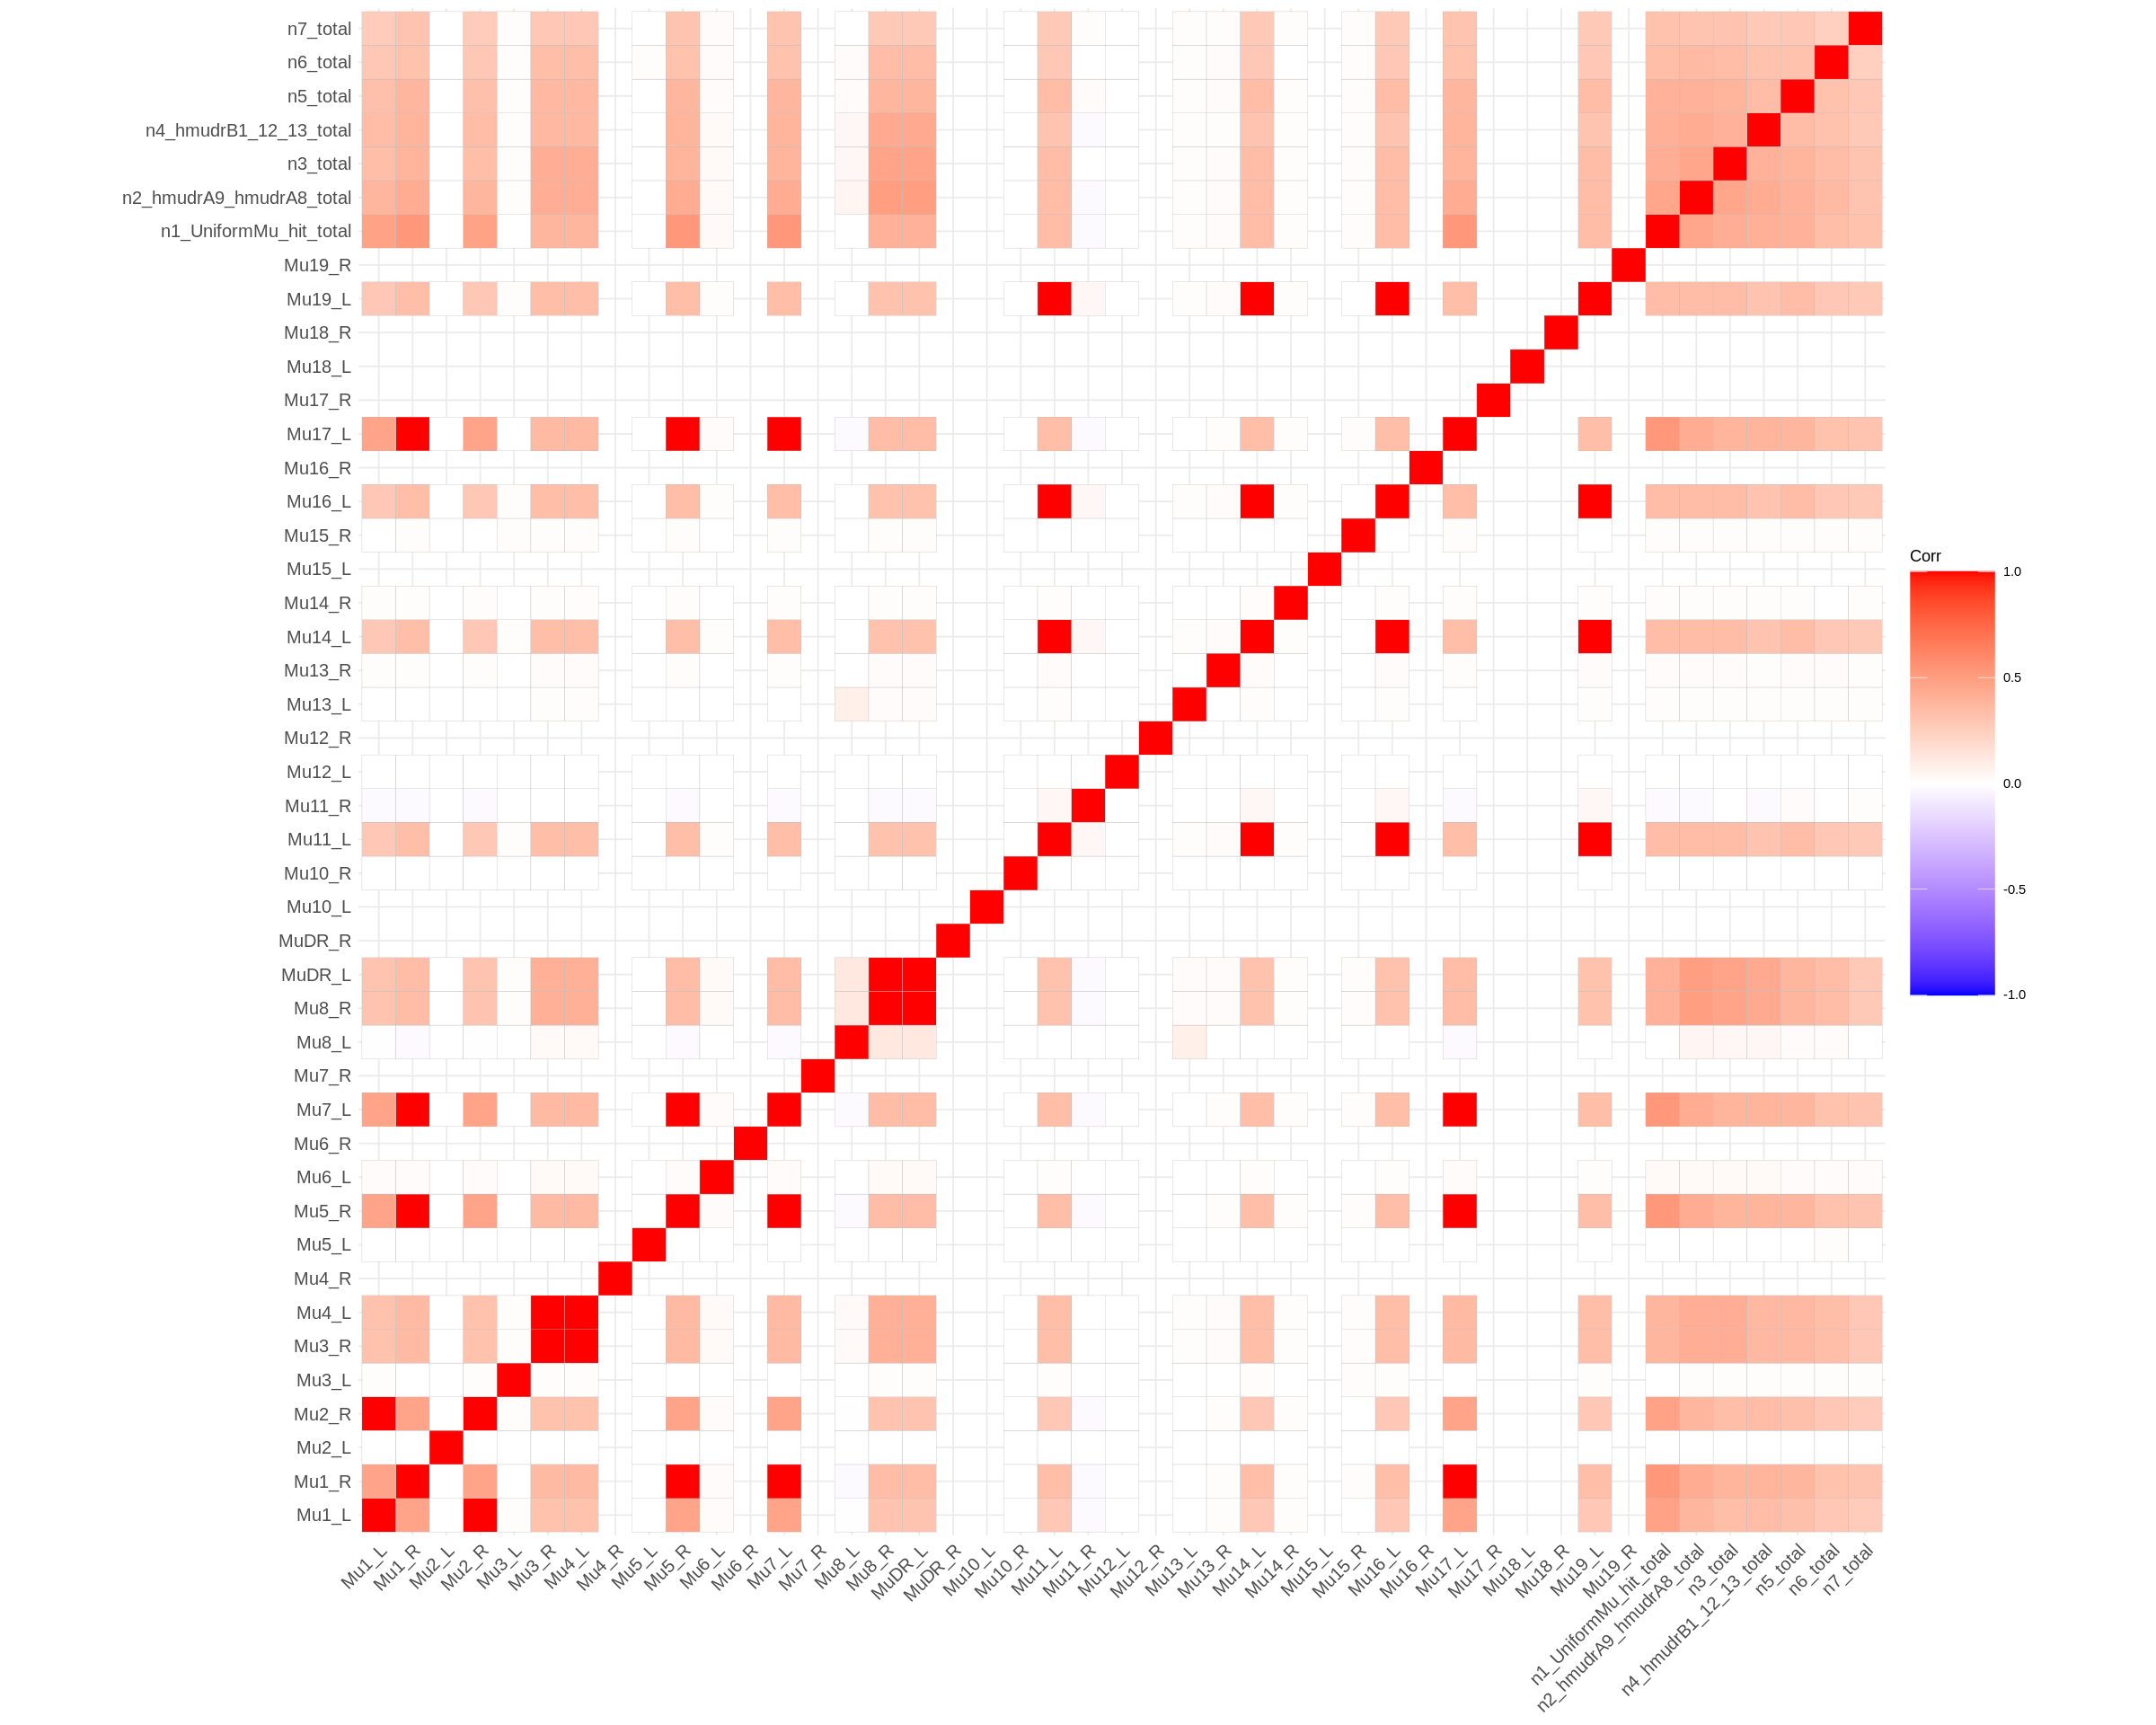

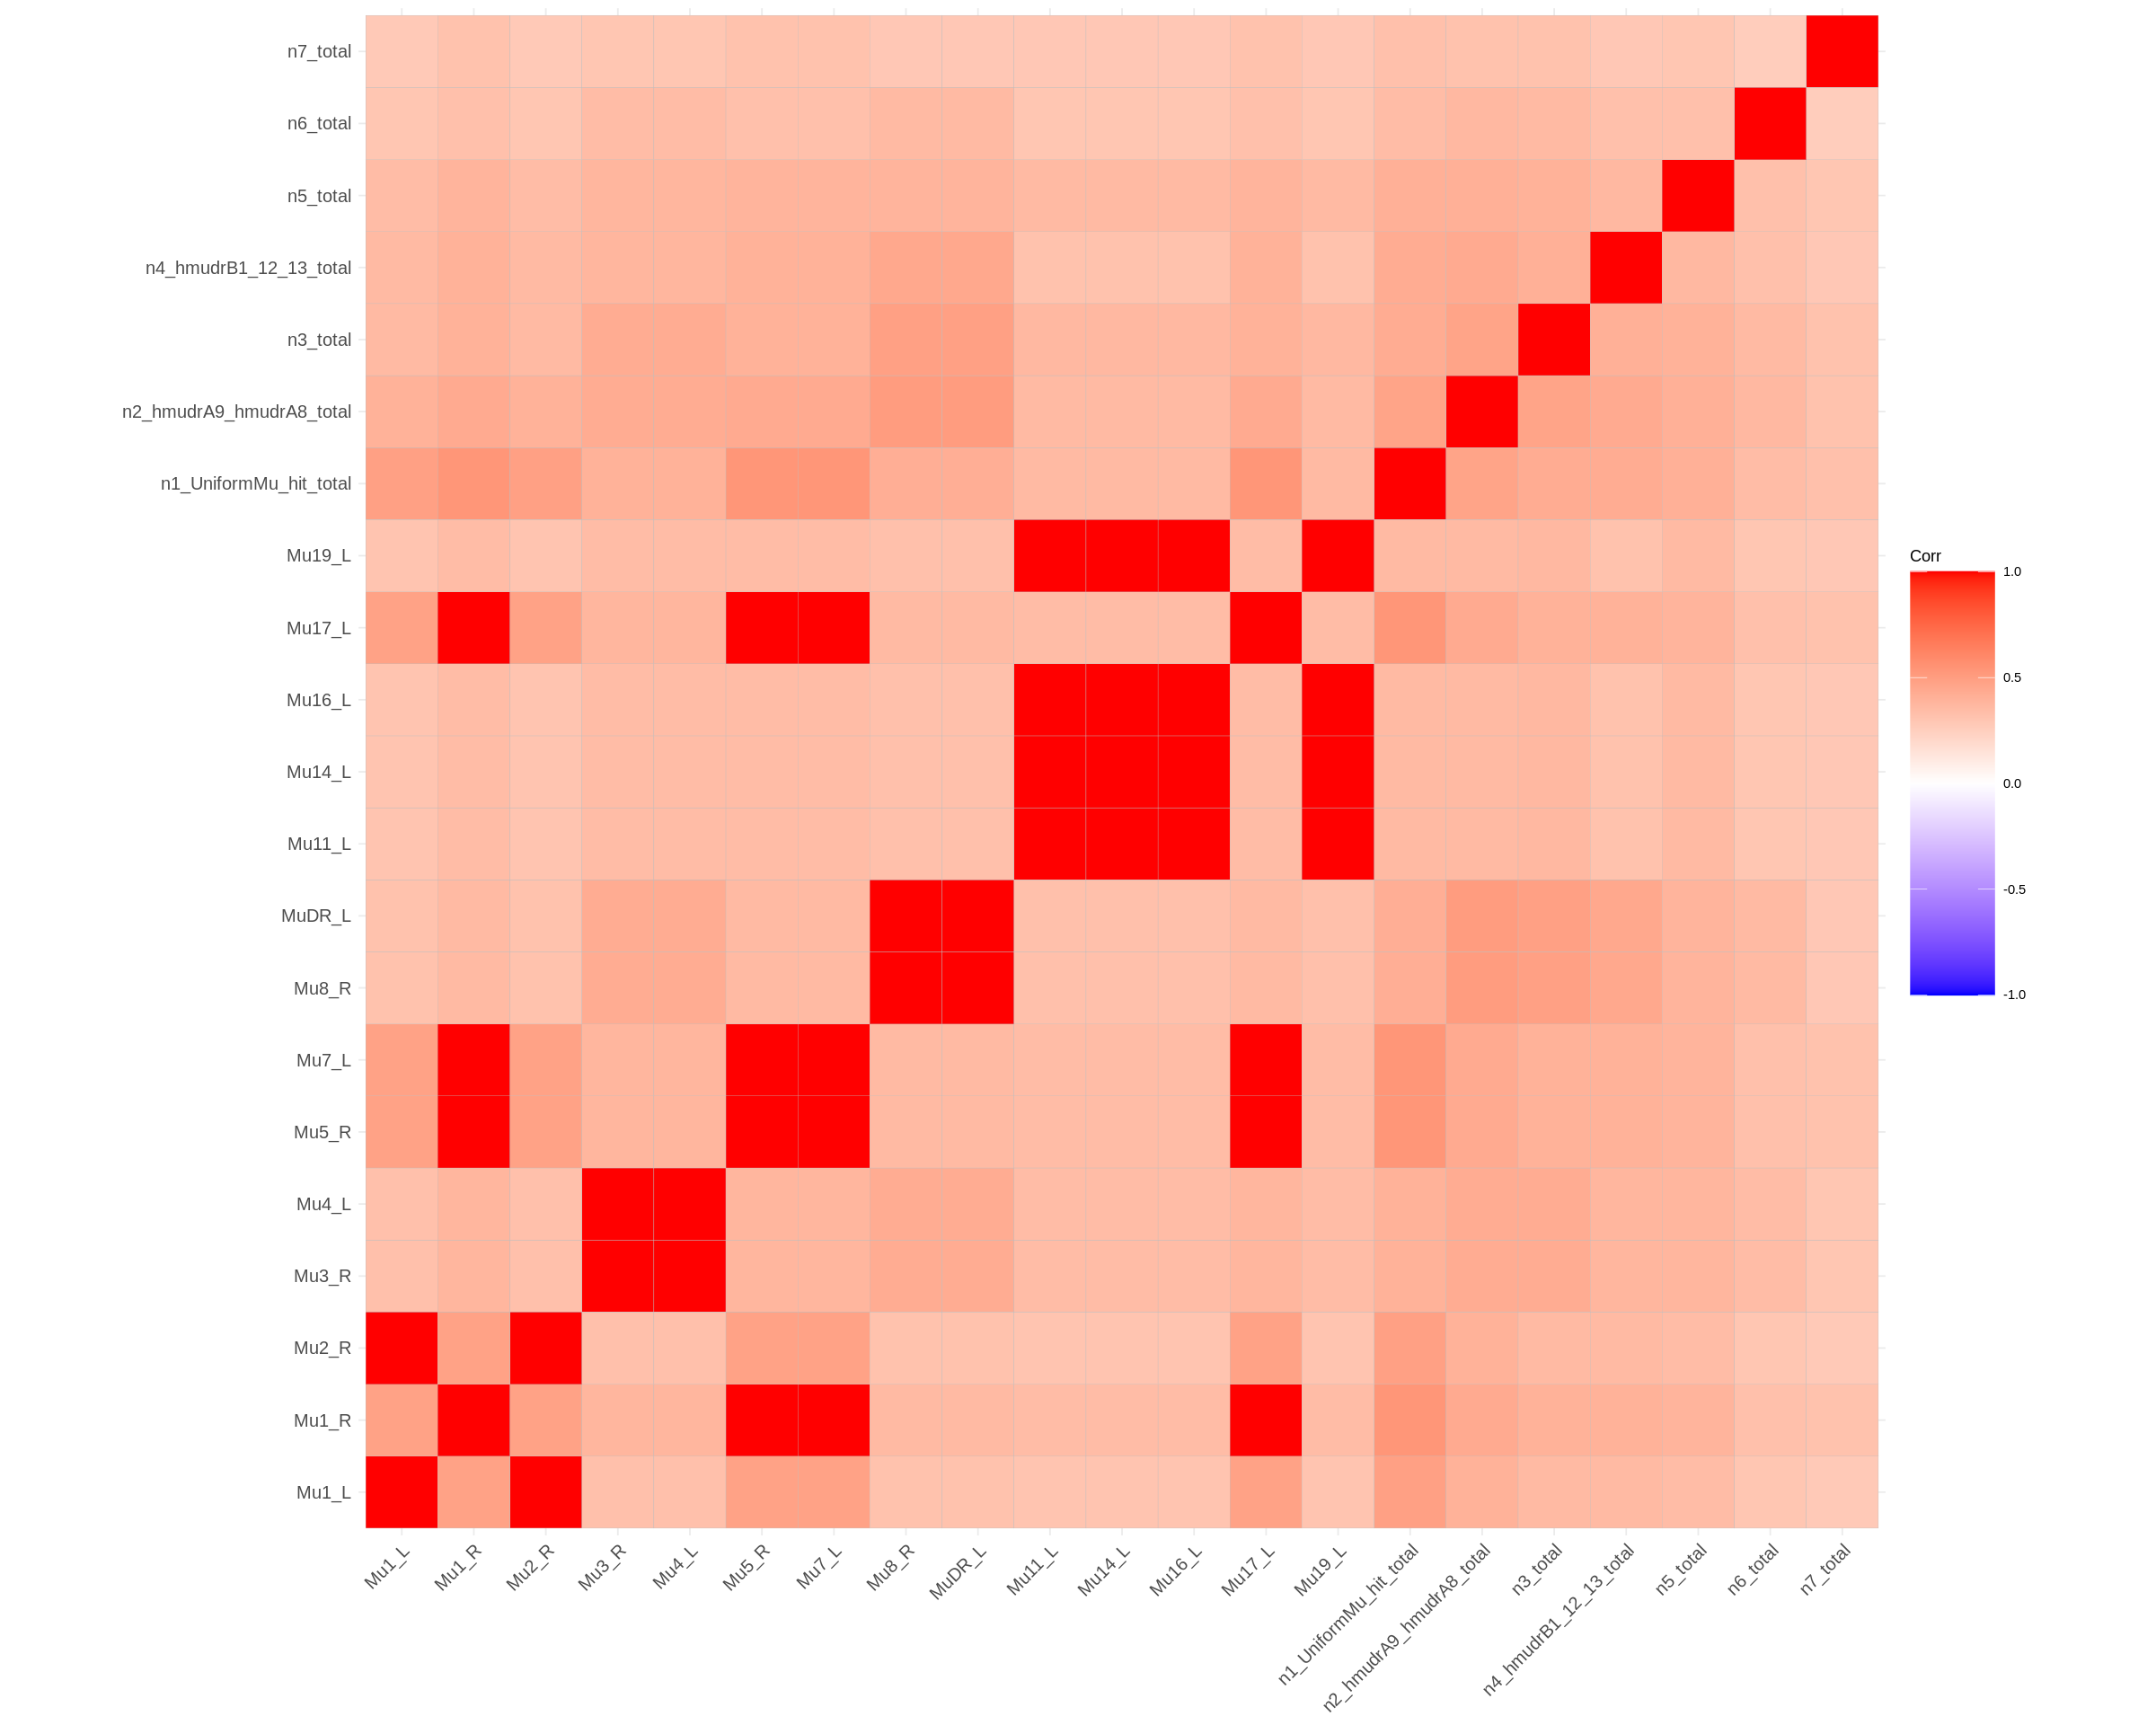

In [103]:
B73_Mu_merged %>%
    filter(lib != "Museq_3") %>%
    filter(StartReads >= 5) %>%
    filter(EndReads >= 5) %>%
    select(Mu1_L, Mu1_R,
           Mu2_L, Mu2_R,
           Mu3_L, Mu3_R,
           Mu4_L, Mu4_R,
           Mu5_L, Mu5_R,
           Mu6_L, Mu6_R,
           Mu7_L, Mu7_R,
           Mu8_L, Mu8_R,
           MuDR_L, MuDR_R,
           Mu10_L, Mu10_R,
           Mu11_L, Mu11_R,
           Mu12_L, Mu12_R,
           Mu13_L, Mu13_R,
           Mu14_L, Mu14_R,
           Mu15_L, Mu15_R,
           Mu16_L, Mu16_R,
           Mu17_L, Mu17_R,
           Mu18_L, Mu18_R,
           Mu19_L, Mu19_R,
           n1_UniformMu_hit_total, 
           n2_hmudrA9_hmudrA8_total,
           n3_total,
           n4_hmudrB1_12_13_total,
           n5_total,
           n6_total,
           n7_total
          ) %>%
    cor(method = "pearson", ) %>% 
      ggcorrplot() +
        theme(legend.key.size = unit(2, 'cm'))

B73_Mu_merged %>%
#    filter(lib != "Museq_3") %>%
    filter(StartReads >= 5) %>%
    filter(EndReads >= 5) %>%
    select(Mu1_L, Mu1_R,
           Mu2_R,
           Mu3_R,
           Mu4_L,
           Mu5_R,
           Mu7_L,
           Mu8_R,
           MuDR_L,
           Mu11_L,
           Mu14_L,
           Mu16_L,
           Mu17_L,
           Mu19_L,
           n1_UniformMu_hit_total, 
           n2_hmudrA9_hmudrA8_total,
           n3_total,
           n4_hmudrB1_12_13_total,
           n5_total,
           n6_total,
           n7_total
          ) %>%
    cor(method = "pearson", ) %>% 
      ggcorrplot() +
        theme(legend.key.size = unit(2, 'cm'))

#### Distribution of type specific Mu species in the maize genomes

In [126]:
#should download manually before - getting timeout problems when letting this be done inside "getChromSizesFromFasta()"
#fastaSource = "http://ftp.ensemblgenomes.org/pub/plants/release-51/fasta/zea_mays/dna/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.dna.toplevel.fa.gz"
#gtfSource = "http://ftp.ensemblgenomes.org/pub/plants/release-51/gtf/zea_mays/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.51.gtf.gz"

fastaSource = "/data/home/stoecker/fdi_genofam_mount/stoecker/general_data/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.dna.toplevel.fa"
gtfSource = "/data/home/stoecker/fdi_genofam_mount/stoecker/general_data/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.52.gtf"

##Get chromosome sizes
#Let’s first have a look, how to extract chromosome sizes:
zea_mays_ChromSizes = getChromSizesFromFasta(source=fastaSource)
zea_mays_ChromSizes <- zea_mays_ChromSizes[1:10]


##Transcription start sites (TSS)
#Now, let’s see, how to extract transcription start sites:
zea_mays_TSSs = getTssFromGTF(source=gtfSource, convertEnsemblUCSC=FALSE)
head(zea_mays_TSSs)

##Gene models
#What about gene models for partition plots?
features = c("gene", "exon", "three_prime_utr", "five_prime_utr")
zea_mays_GeneModels = getGeneModelsFromGTF(source=gtfSource, features=features, convertEnsemblUCSC=FALSE)

#You can now pass the CEelegansGeneModels object to genomePartitionList function, which created list of genomic partitions that are then passed to calcPartitions function as partitionList argument.
partitionList = genomePartitionList(zea_mays_GeneModels$gene,
                                    zea_mays_GeneModels$exon,
                                    zea_mays_GeneModels$three_prime_utr, 
                                    zea_mays_GeneModels$five_prime_utr)

Got local file: /data/home/stoecker/fdi_genofam_mount/stoecker/general_data/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.dna.toplevel.fa

Got local file: /data/home/stoecker/fdi_genofam_mount/stoecker/general_data/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.52.gtf



GRanges object with 6 ranges and 13 metadata columns:
      seqnames              ranges strand |   source     type     score
         <Rle>           <IRanges>  <Rle> | <factor> <factor> <numeric>
  [1]        1 121469876-121469877      - |  ensembl     gene        NA
  [2]        1 278982201-278982202      + |  ensembl     gene        NA
  [3]        1 262069826-262069827      - |  ensembl     gene        NA
  [4]        1 275838514-275838515      - |  ensembl     gene        NA
  [5]        1 269155555-269155556      + |  ensembl     gene        NA
  [6]        1   13037018-13037019      + |  ensembl     gene        NA
          phase         gene_id gene_source   gene_biotype transcript_id
      <integer>     <character> <character>    <character>   <character>
  [1]      <NA> Zm00001eb026490     ensembl protein_coding          <NA>
  [2]      <NA> Zm00001eb056070     ensembl protein_coding          <NA>
  [3]      <NA> Zm00001eb051700     ensembl protein_coding          <NA>
  [4]

Got local file: /data/home/stoecker/fdi_genofam_mount/stoecker/general_data/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.52.gtf

Extracting features: gene, exon, three_prime_utr, five_prime_utr



In [111]:
bins  = getGenomeBins(zea_mays_ChromSizes, binCount = 10000)

#we can remove all additional contiqs with this handy command
#?keepStandardChromosomes
bins = keepStandardChromosomes(bins, pruning.mode="coarse")

In [109]:
head(Mu1_candidates)

lib,Chr,GeneStart,InsertionStart,GeneID,type_candidates,Samples,stock,TotalReads,perc_best_type_of_types,frac_proof_reads
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
Museq_6,3,158081035,158082624,Zm00001eb142390,Mu1,Row_06|Col_15,B-785,24,0.5419580,13.00699
Museq_6,10,143196860,143202521,Zm00001eb430350,Mu1,Row_18|Col_01,C-137,21,0.5272727,11.07273
Museq_F7_1,1,16122256,16122536,Zm00001eb005710,Mu1,Row_02|Col_23,F-0047,43,0.5268817,22.65591
Museq_5,7,142050974,142052450,Zm00001eb317510,Mu1,Row_19|Col_22,B-0527,44,0.5205882,22.90588
Museq_5,7,142051798,142052450,Zm00001eb317520,Mu1,Row_19|Col_22,B-0527,44,0.5205882,22.90588
Museq_5,1,28542661,28542655,Zm00001eb009240,Mu1,Row_20|Col_24,B-0553,34,0.5073260,17.24908


In [226]:
#get complete sets of candidates

Mu1_candidates <- best_candidate_determination(mu_species = "Mu1", read_support_threshold = 2, max_output_rows = "all")
Mu8_MuDR_candidates <- best_candidate_determination(mu_species = "Mu8|MuDR", read_support_threshold = 2, max_output_rows = "all")
n1_UniformMu_hit_candidates <- best_candidate_determination(mu_species = "n1_UniformMu_hit", read_support_threshold = 2, max_output_rows = "all")
n2_hmudrA9_hmudrA8_candidates <- best_candidate_determination(mu_species = "n2_hmudrA9_hmudrA8", read_support_threshold = 2, max_output_rows = "all")
n3_candidates <- best_candidate_determination(mu_species = "n3", read_support_threshold = 2, max_output_rows = "all")
Mu1_Mu5_Mu7_Mu17_candidates <- best_candidate_determination(mu_species = "Mu1|Mu5|Mu7|Mu17", read_support_threshold = 2, max_output_rows = "all")
Mu3_Mu4_candidates <- best_candidate_determination(mu_species = "Mu3|Mu4", read_support_threshold = 2, max_output_rows = "all")
n4_hmudrB1_12_13_candidates <- best_candidate_determination(mu_species = "n4_hmudrB1_12_13", read_support_threshold = 2, max_output_rows = "all")
n5_candidates <- best_candidate_determination(mu_species = "n5", read_support_threshold = 2, max_output_rows = "all")
Mu8_candidates <- best_candidate_determination(mu_species = "Mu8", read_support_threshold = 2, max_output_rows = "all")
Mu11_Mu14_Mu16_Mu19_candidates <- best_candidate_determination(mu_species = "Mu11|Mu14|Mu16|Mu19", read_support_threshold = 2, max_output_rows = "all")
Mu1_Mu2_candidates <- best_candidate_determination(mu_species = "Mu1|Mu2", read_support_threshold = 2, max_output_rows = "all")
n6_candidates <- best_candidate_determination(mu_species = "n6", read_support_threshold = 2, max_output_rows = "all")
#read support set to 2 since no good cases where both ROW+COL pool support
n7_candidates <- best_candidate_determination(mu_species = "n7", read_support_threshold = 2, max_output_rows = "all")

`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID', 'type_candidates',
'Samples'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID', 'type_candidates',
'Samples'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID', 'type_candidates',
'Samples'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID', 'type_candidates',
'Samples'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID', 'type_candidates',
'Samples'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID', 'type_candidates',
'Samples'. You can override using the `.groups` ar

In [227]:
Mu1_candidates_gr <- GRanges(seqnames = Mu1_candidates$Chr, ranges = IRanges(start = Mu1_candidates$InsertionStart, end = Mu1_candidates$InsertionStart+8))
Mu8_MuDR_candidates_gr <- GRanges(seqnames = Mu8_MuDR_candidates$Chr, ranges = IRanges(start = Mu8_MuDR_candidates$InsertionStart, end = Mu8_MuDR_candidates$InsertionStart+8)) 
n1_UniformMu_hit_candidates_gr <- GRanges(seqnames = n1_UniformMu_hit_candidates$Chr, ranges = IRanges(start = n1_UniformMu_hit_candidates$InsertionStart, end = n1_UniformMu_hit_candidates$InsertionStart+8)) 
n2_hmudrA9_hmudrA8_candidates_gr <- GRanges(seqnames = n2_hmudrA9_hmudrA8_candidates$Chr, ranges = IRanges(start = n2_hmudrA9_hmudrA8_candidates$InsertionStart, end = n2_hmudrA9_hmudrA8_candidates$InsertionStart+8)) 
n3_candidates_gr <- GRanges(seqnames = n3_candidates$Chr, ranges = IRanges(start = n3_candidates$InsertionStart, end = n3_candidates$InsertionStart+8)) 
Mu1_Mu5_Mu7_Mu17_candidates_gr <- GRanges(seqnames = Mu1_Mu5_Mu7_Mu17_candidates$Chr, ranges = IRanges(start = Mu1_Mu5_Mu7_Mu17_candidates$InsertionStart, end = Mu1_Mu5_Mu7_Mu17_candidates$InsertionStart+8)) 
Mu3_Mu4_candidates_gr <- GRanges(seqnames = Mu3_Mu4_candidates$Chr, ranges = IRanges(start = Mu3_Mu4_candidates$InsertionStart, end = Mu3_Mu4_candidates$InsertionStart+8)) 
n4_hmudrB1_12_13_candidates_gr <- GRanges(seqnames = n4_hmudrB1_12_13_candidates$Chr, ranges = IRanges(start = n4_hmudrB1_12_13_candidates$InsertionStart, end = n4_hmudrB1_12_13_candidates$InsertionStart+8)) 
n5_candidates_gr <- GRanges(seqnames = n5_candidates$Chr, ranges = IRanges(start = n5_candidates$InsertionStart, end = n5_candidates$InsertionStart+8)) 
Mu8_candidates_gr <- GRanges(seqnames = Mu8_candidates$Chr, ranges = IRanges(start = Mu8_candidates$InsertionStart, end = Mu8_candidates$InsertionStart+8)) 
Mu11_Mu14_Mu16_Mu19_candidates_gr <- GRanges(seqnames = Mu11_Mu14_Mu16_Mu19_candidates$Chr, ranges = IRanges(start = Mu11_Mu14_Mu16_Mu19_candidates$InsertionStart, end = Mu11_Mu14_Mu16_Mu19_candidates$InsertionStart+8)) 
Mu1_Mu2_candidates_gr <- GRanges(seqnames = Mu1_Mu2_candidates$Chr, ranges = IRanges(start = Mu1_Mu2_candidates$InsertionStart, end = Mu1_Mu2_candidates$InsertionStart+8)) 
n6_candidates_gr <- GRanges(seqnames = n6_candidates$Chr, ranges = IRanges(start = n6_candidates$InsertionStart, end = n6_candidates$InsertionStart+8)) 
n7_candidates_gr <- GRanges(seqnames = n7_candidates$Chr, ranges = IRanges(start = n7_candidates$InsertionStart, end = n7_candidates$InsertionStart+8)) 

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Warning message:
“Removed 24 rows containing missing values (geom_bar).”


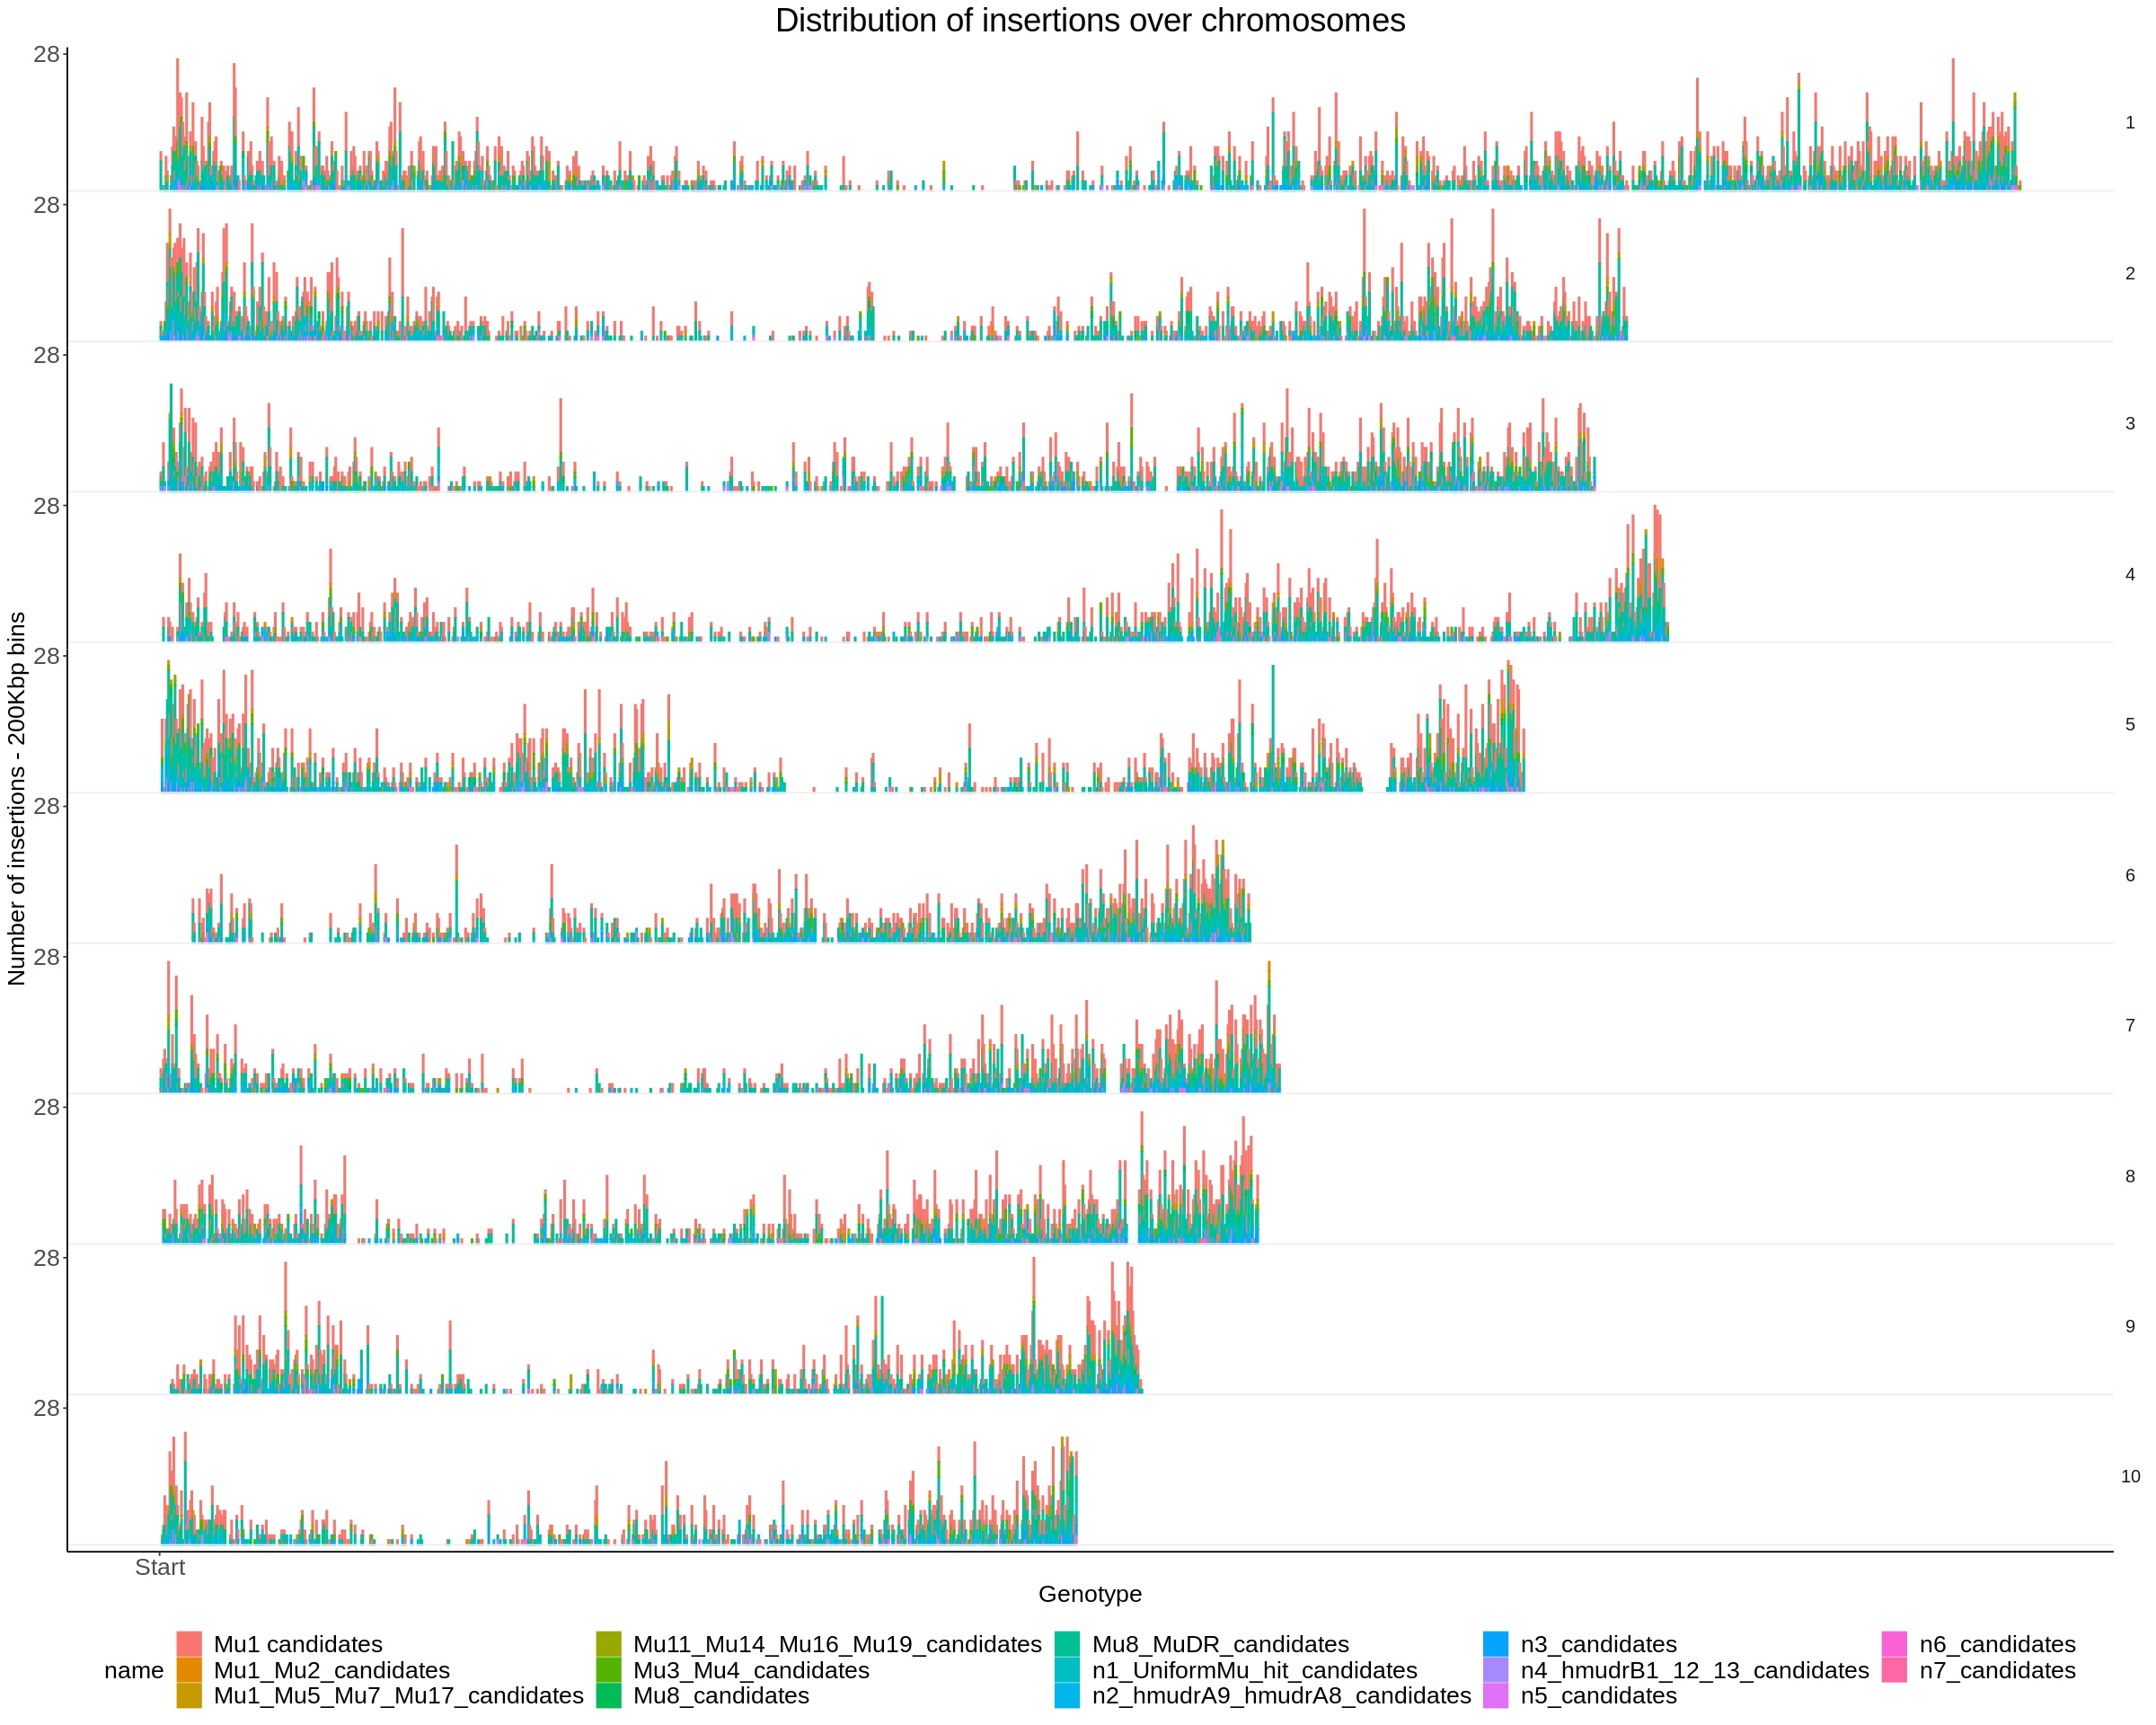

In [228]:
queryList = GRangesList(Mu1_candidates_gr, Mu8_MuDR_candidates_gr, n1_UniformMu_hit_candidates_gr, n2_hmudrA9_hmudrA8_candidates_gr,
                        n3_candidates_gr, Mu1_Mu5_Mu7_Mu17_candidates_gr, Mu3_Mu4_candidates_gr, n4_hmudrB1_12_13_candidates_gr,
                        n5_candidates_gr, Mu8_candidates_gr, Mu11_Mu14_Mu16_Mu19_candidates_gr, Mu1_Mu2_candidates_gr, 
                        n6_candidates_gr, n7_candidates_gr)

names(queryList) <- c("Mu1 candidates", "Mu8_MuDR_candidates", "n1_UniformMu_hit_candidates", "n2_hmudrA9_hmudrA8_candidates", 
                      "n3_candidates", "Mu1_Mu5_Mu7_Mu17_candidates", "Mu3_Mu4_candidates", "n4_hmudrB1_12_13_candidates",
                      "n5_candidates", "Mu8_candidates", "Mu11_Mu14_Mu16_Mu19_candidates", "Mu1_Mu2_candidates", 
                      "n6_candidates", "n7_candidates")

#queryList = GRangesList(Mu1_candidates_gr, Mu8_MuDR_candidates_gr)
#names(queryList) <- c("Mu1 candidates", "Mu8_MuDR_candidates")

x = calcChromBins(queryList, bins)
plotChromBins(x) +
  labs(x = "Genotype", 
       y = "Number of insertions - 200Kbp bins", 
       title = "Distribution of insertions over chromosomes") +
  theme(plot.title = element_text(size=22), 
        legend.title = element_text(size=16),
        legend.text = element_text(size=16),
        axis.text.x = element_text(size=16),
        axis.text.y = element_text(size=16),
        text = element_text(size=16)
       )

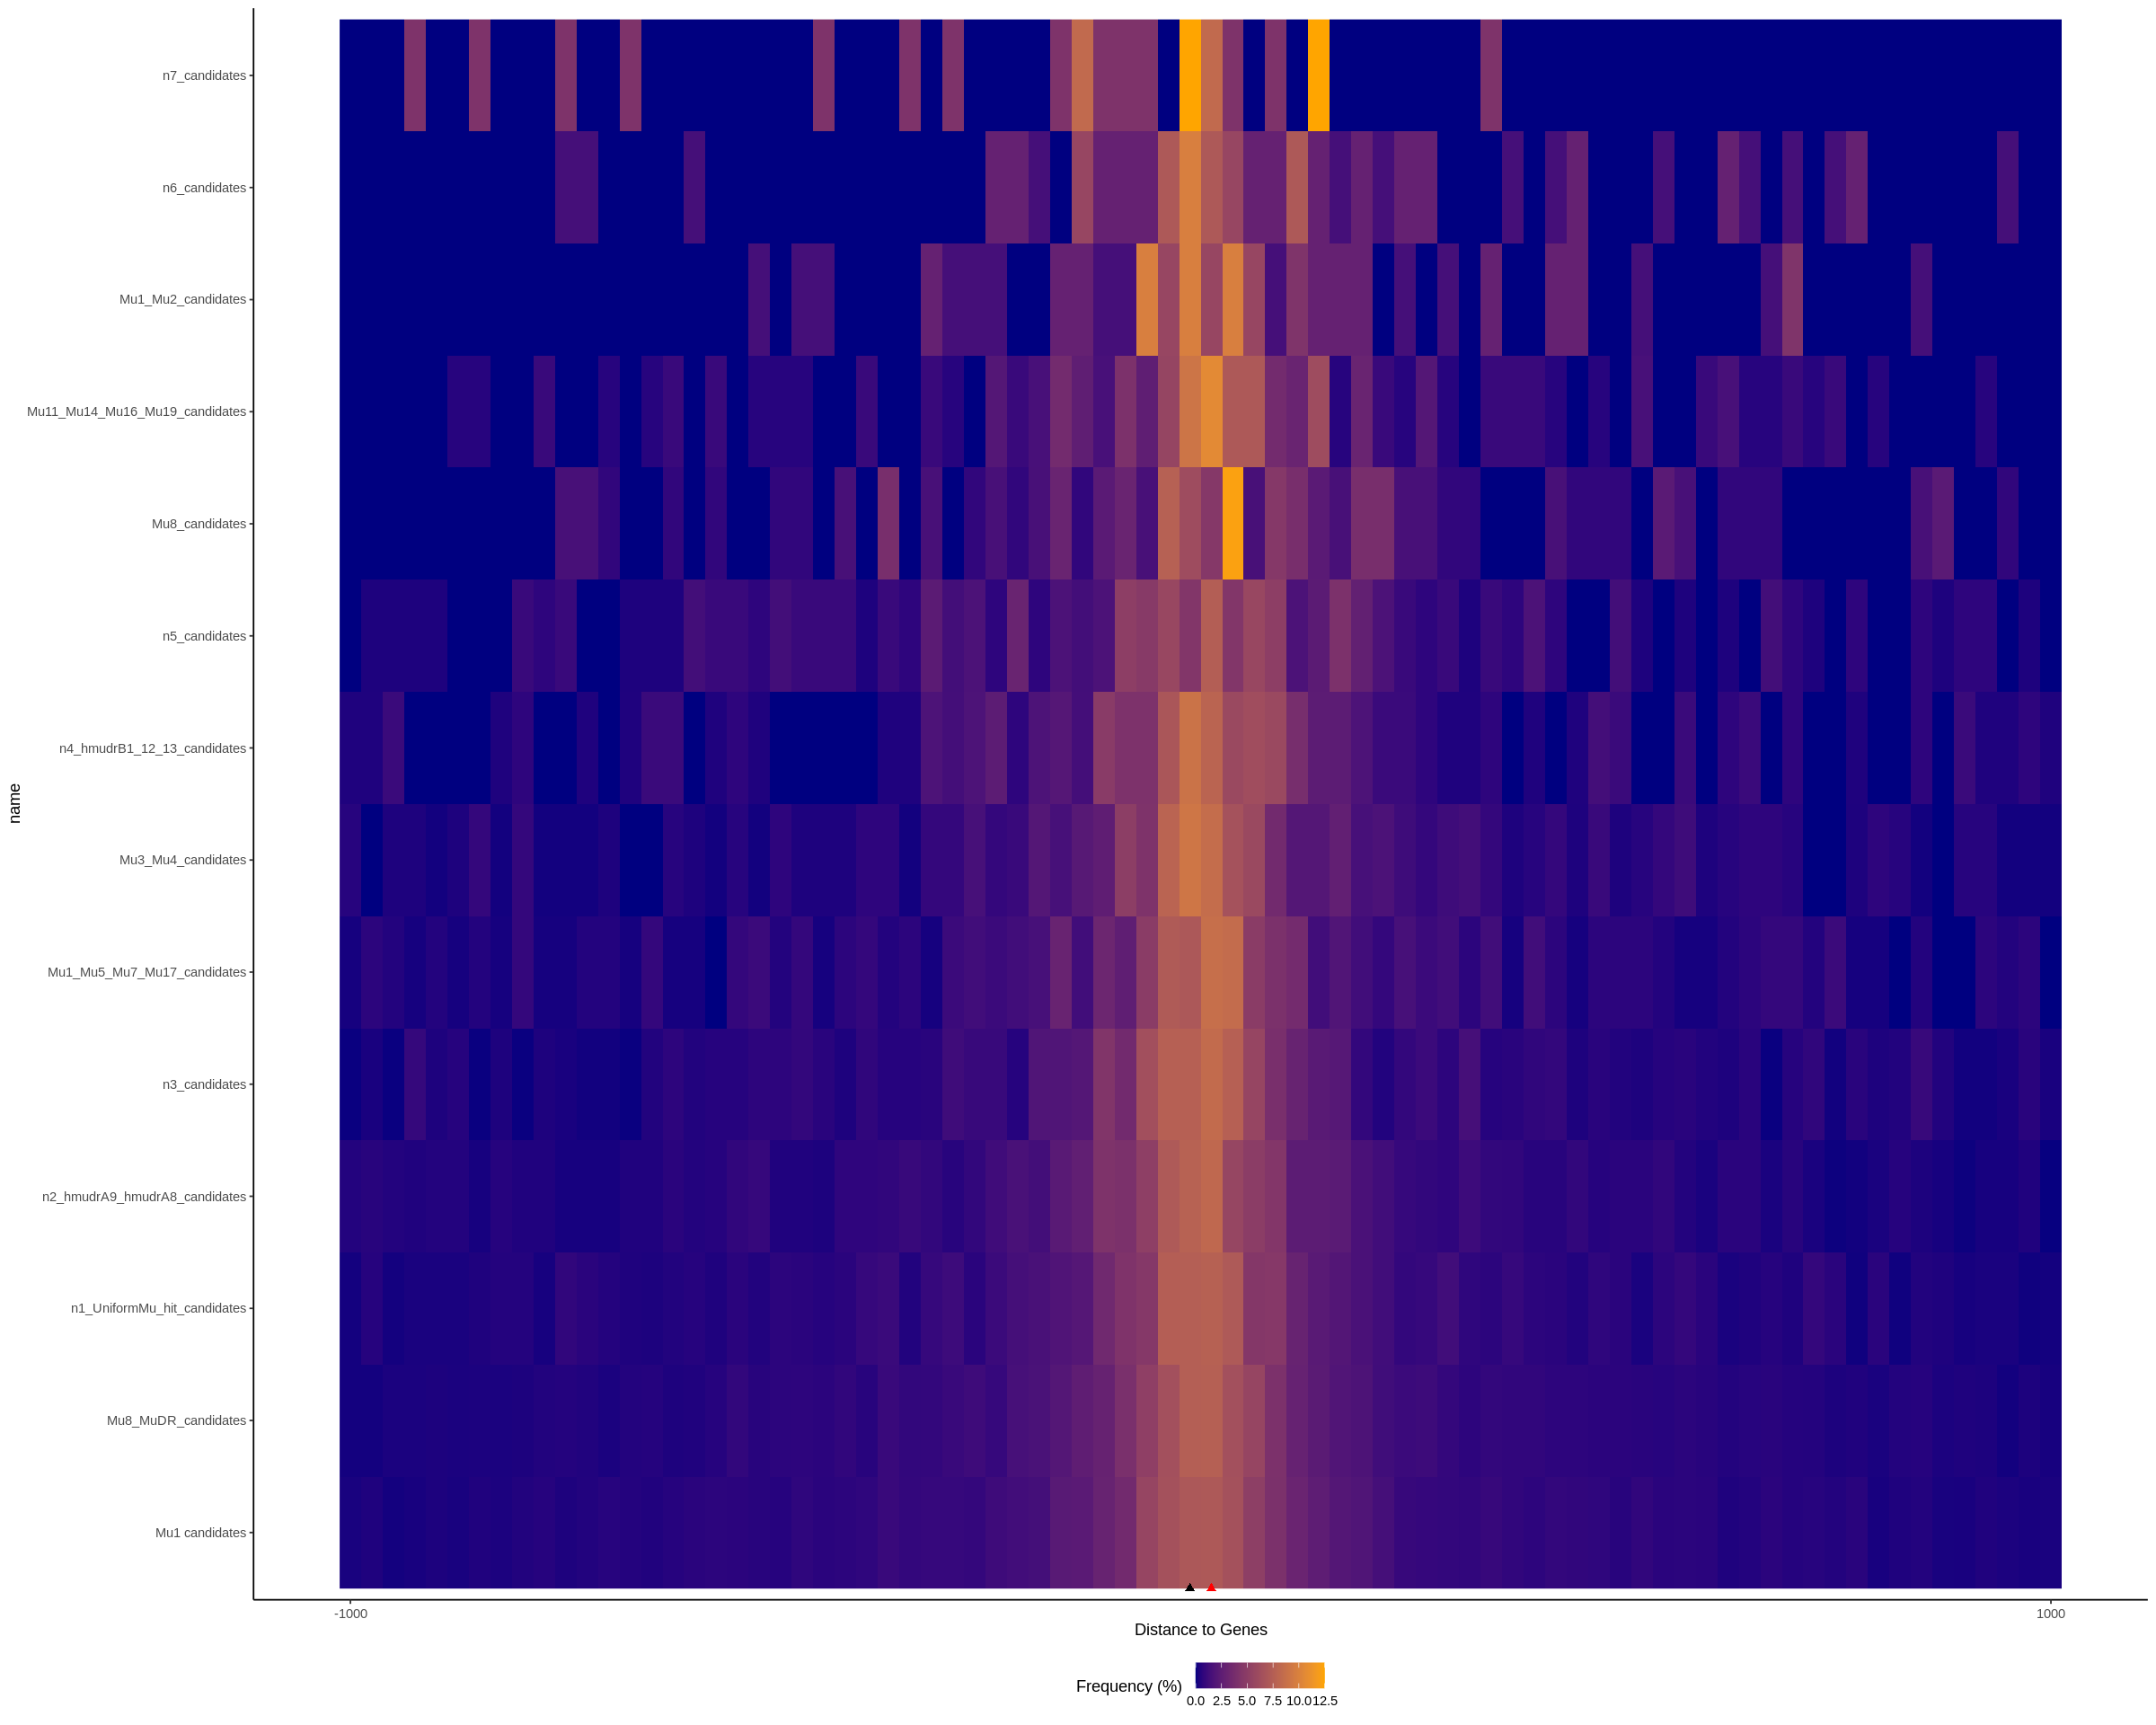

In [229]:
#featureDist
nbins=40

GeneDist = calcFeatureDist(query = queryList, features = partitionList$fiveUTR)
#GeneDist <- lapply(GeneDist, FUN = quick_invert)
# Then plot the result:
plotFeatureDist(GeneDist, featureName="Genes", size = 1e3, nbins = nbins, tile = TRUE, labelOrder = "default") +
  geom_point(aes(x=nbins+1, y=0.5), color="red", 
                   size=2, shape=17, alpha=0.8)

Warning message in max(start, i.start):
“no non-missing arguments to max; returning -Inf”
Warning message in min(end, i.end):
“no non-missing arguments to min; returning Inf”
Warning message in max(start, i.start):
“no non-missing arguments to max; returning -Inf”
Warning message in min(end, i.end):
“no non-missing arguments to min; returning Inf”


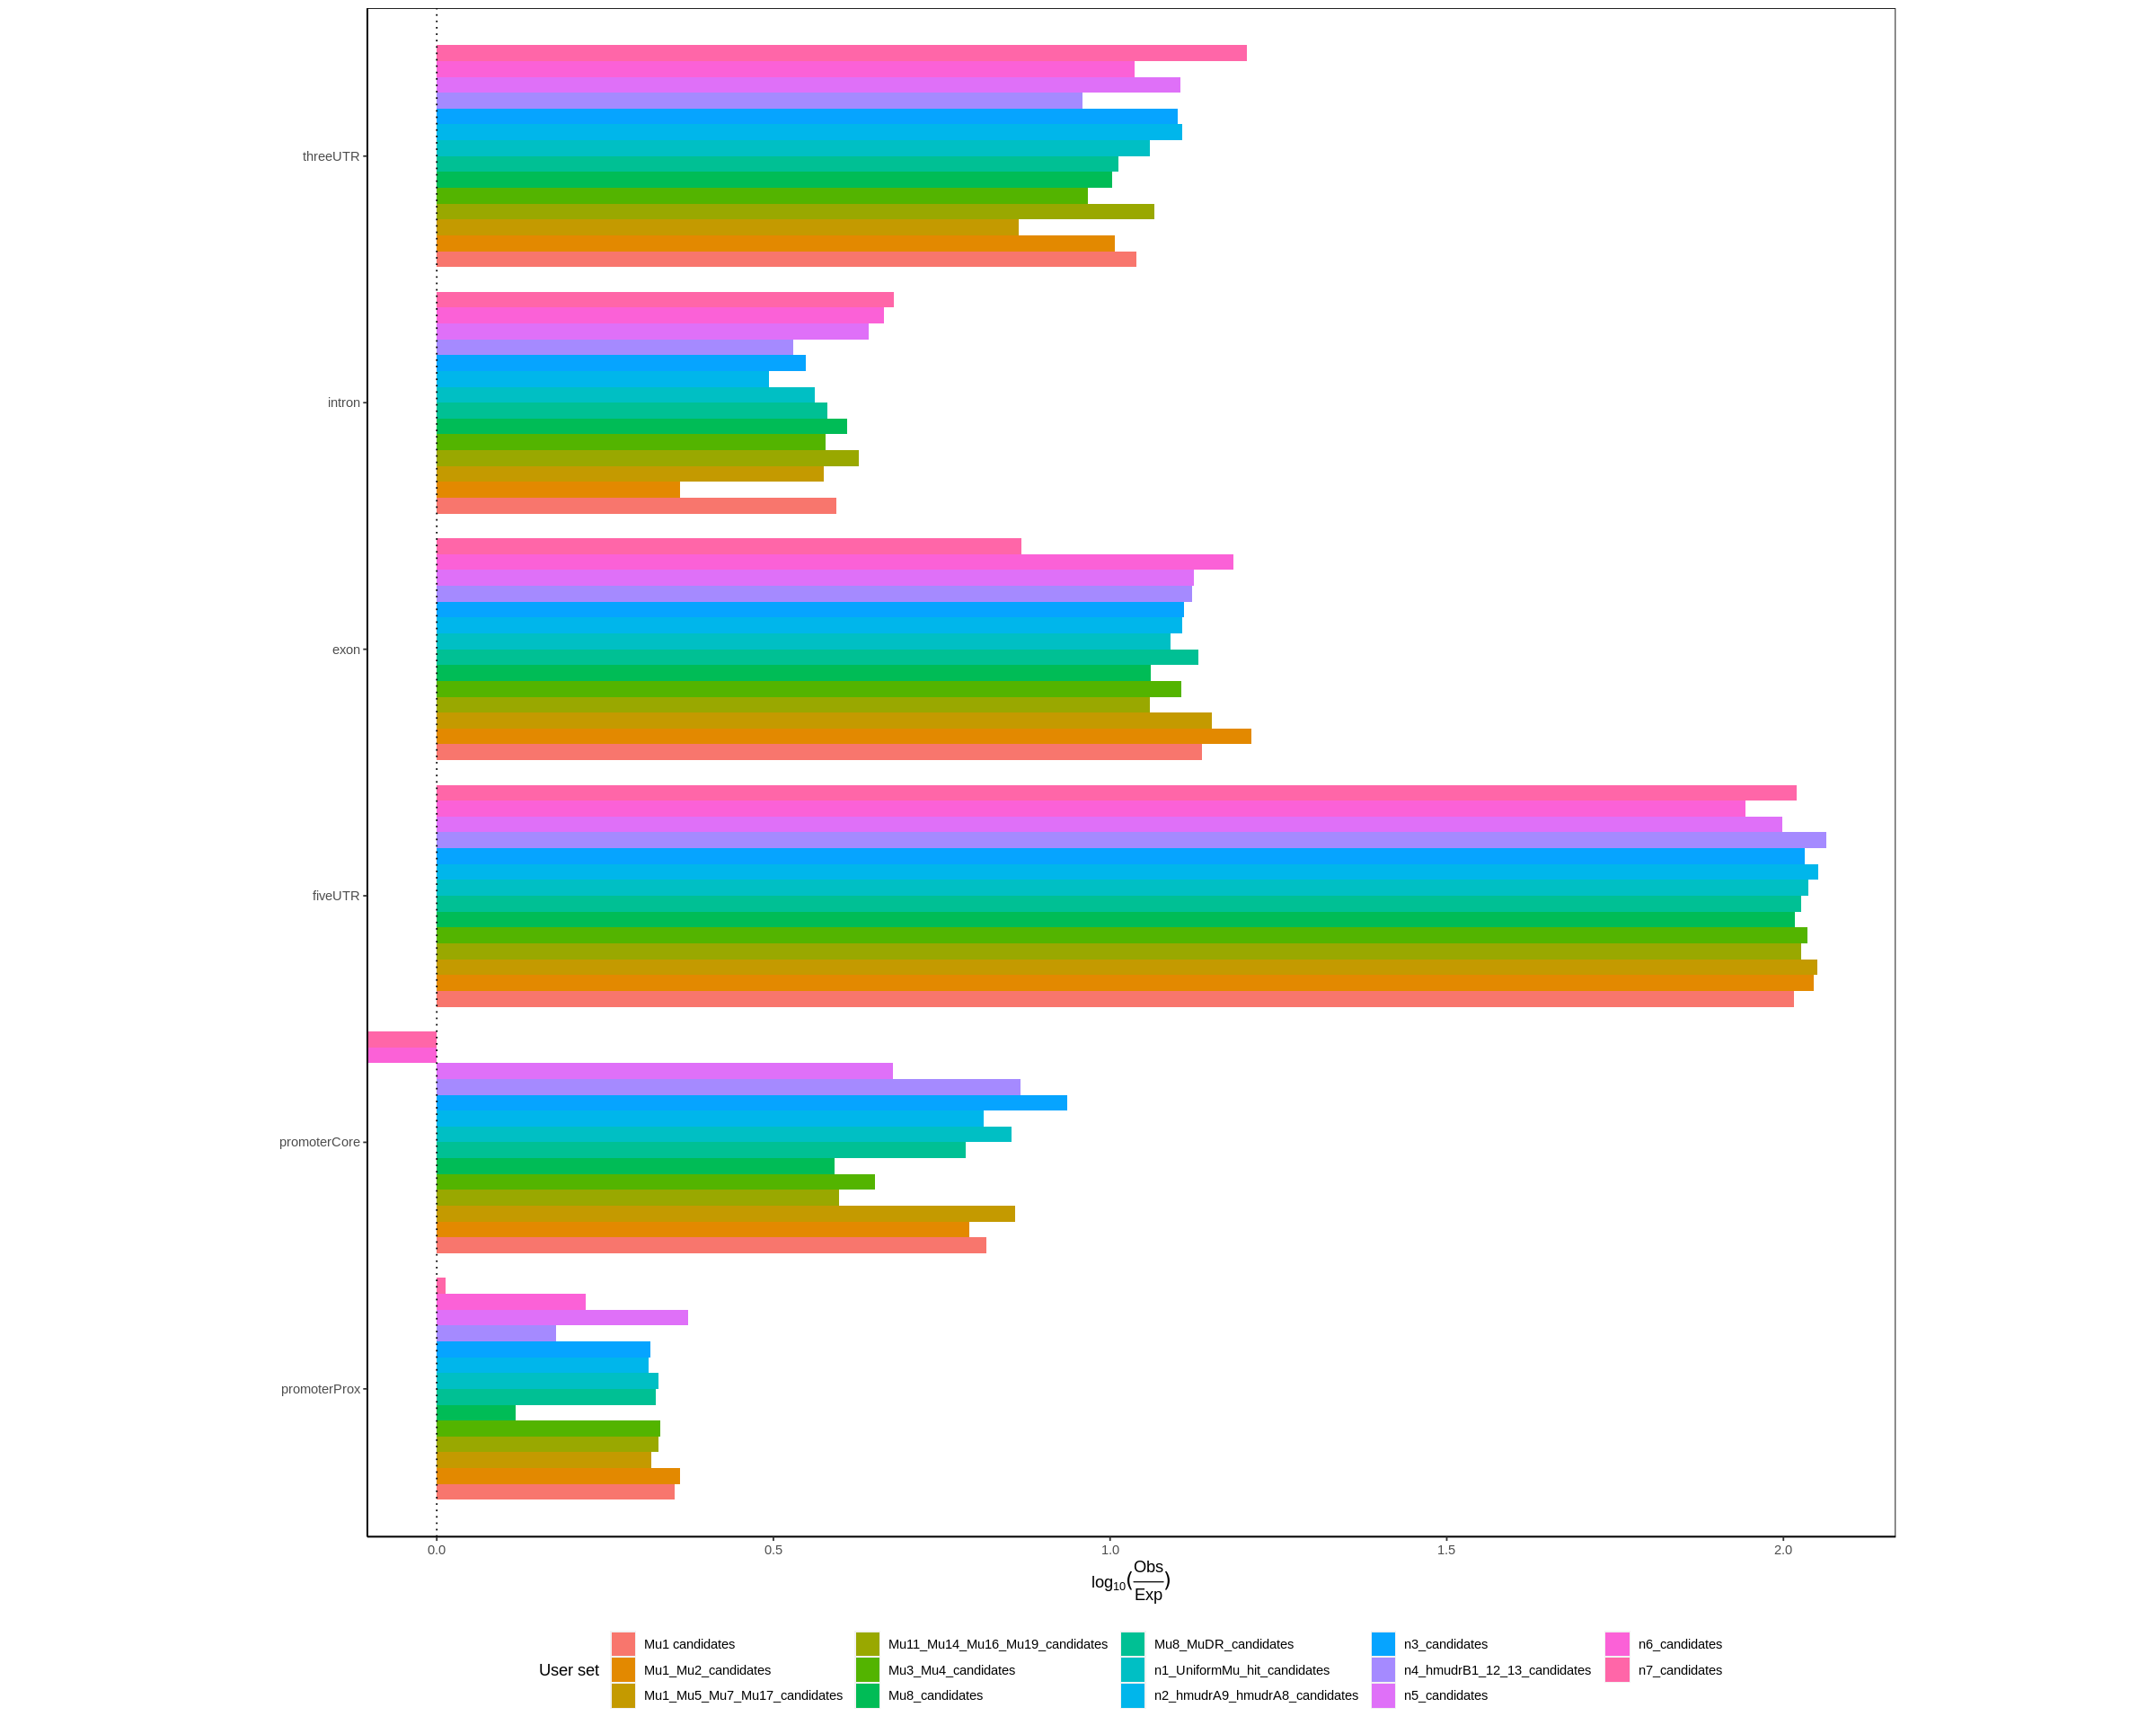

In [230]:
#make a queryList with all somatic vs. all germinal

gp = calcPartitions(queryList, partitionList)
#plotPartitions(gp, stacked = TRUE)

gp = calcExpectedPartitions(queryList, partitionList, genomeSize = 2182075994, remainder = FALSE, bpProportion = TRUE)

my_order <- c("promoterProx", "promoterCore", "fiveUTR", "exon", "intron", "threeUTR", "intergenic")
gp$partition <- factor(gp$partition, levels = my_order)

plotExpectedPartitions(gp)

In [204]:
gp %>%
  filter(name == "n7_candidates")

partition,observed,expected,log10OE,name
<fct>,<dbl>,<dbl>,<dbl>,<chr>
promoterCore,0,0.4327633,-Inf,n7_candidates
promoterProx,9,8.1237161,0.04448777,n7_candidates
threeUTR,27,1.5745451,1.23420867,n7_candidates
fiveUTR,126,1.1995441,2.02135433,n7_candidates
exon,27,4.5452866,0.77380250,n7_candidates
intron,63,12.2775279,0.71022962,n7_candidates
NA,0,214.8466170,-Inf,n7_candidates


### Tables for ordering scientists... primer help

### Playing around with the clustering results

In [97]:
final_clstr <- read.delim("../../only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions_annotated.tsv", sep="\t")
names(final_clstr) <- c("rep_read", "freq", "motif")
head(final_clstr)

,rep_read,freq,motif
,<chr>,<int>,<chr>
1,HISEQ:638:CC9MVANXX:6:1101:15163:55403\1,2862,CTCTCTTCGTCTATAATGGCAATTATCTC
2,HISEQ:638:CC9MVANXX:6:1101:5469:83060\1,2426,CGCTCTTCTTCTATAATGGCAATTATCTC
3,HISEQ:638:CC9MVANXX:6:1101:17590:10404\1,2258,CCCTCTTCGTCTATAATGGCAATTATCTC
4,HISEQ:638:CC9MVANXX:6:1101:15345:24148\1,1929,CGCTCTTCTTCCATAATGGCAATTATCTC
5,HISEQ:638:CC9MVANXX:6:1101:6445:82894\1,1213,CCCTCTTCTTCTATAATGGCAATTATCTC
6,HISEQ:638:CC9MVANXX:6:1101:4207:13062\1,1111,CCCTCTTCTTCCATAATGGCAATTATCTC


In [98]:
total_uncategorized_reads <- sum(final_clstr$freq)
top_7_motifs <- sum(final_clstr$freq[1:7])

total_uncategorized_reads
top_7_motifs

round(
  (top_7_motifs/total_uncategorized_reads)*100,
  digits = 2  
)

[1] 13210

[1] 11853

[1] 89.73

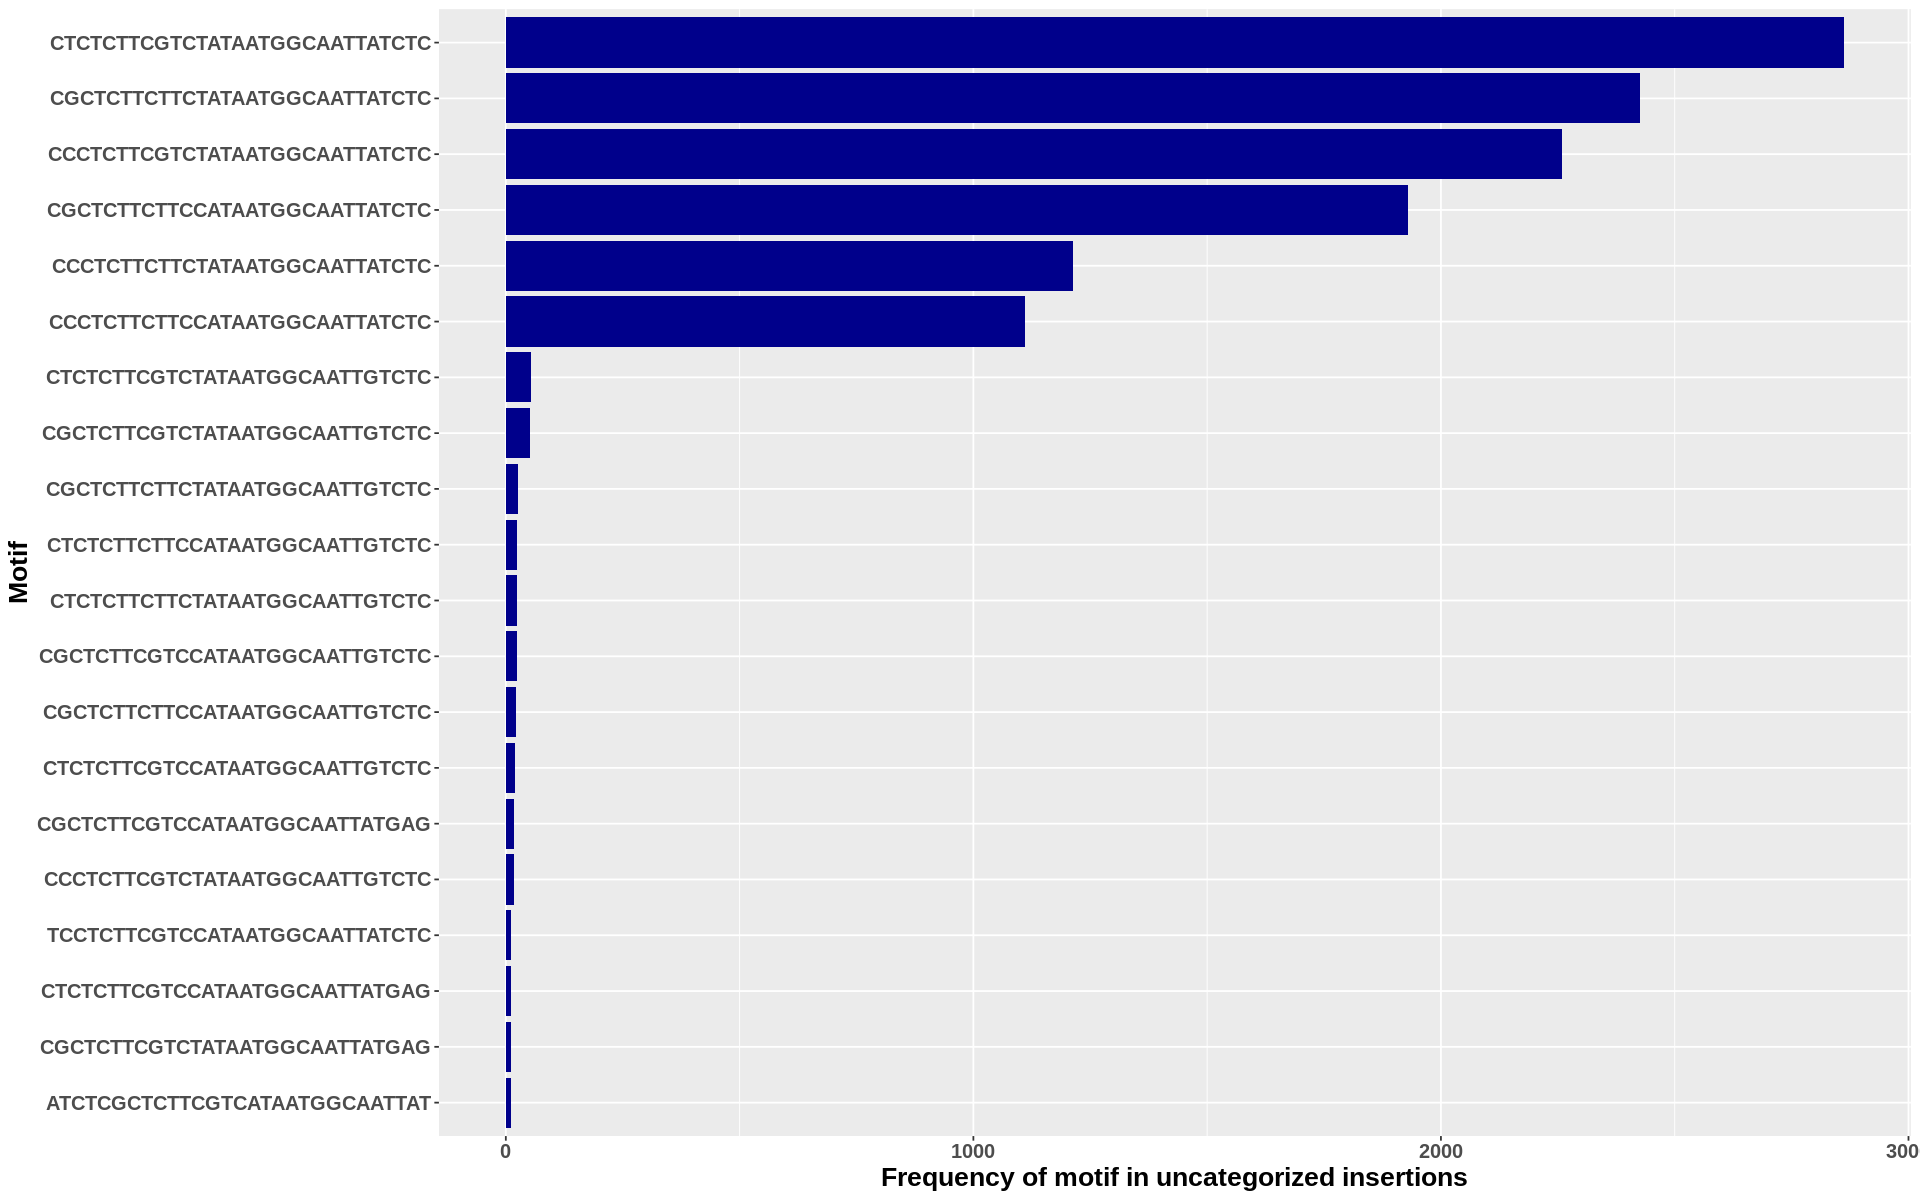

In [99]:
options(repr.plot.width=16, repr.plot.height=10)

final_clstr %>%
  head(n = 20) %>%
  #plotting
  #quick tips on reordering bars; https://sebastiansauer.github.io/ordering-bars/
  ggplot(., aes(y= reorder(motif, freq), x=freq)) +
    geom_col(fill = "darkblue") +
    xlab("Frequency of motif in uncategorized insertions") +
    ylab("Motif") +
    theme(axis.text=element_text(size=12, face="bold"),
          axis.title=element_text(size=16,face="bold"))

#### Plotting with ggtree